## Merging the CSV files of Hourly Pollutants Concentrations in to one file

In [1]:
import os
import zipfile
import pandas as pd
from glob import glob

## Extracting the downloaded zip files to csv files

In [9]:
# Define the paths
zip_folder_path = "F:/archive-20241006T171729Z-001/archive"  # Path containing zip files
extracted_folder_path = "F:/extract"  # Path to extract zip files

# Step 1: Extract all the zipped folders
if not os.path.exists(extracted_folder_path):
    os.makedirs(extracted_folder_path)

# Extract all the zip files
for zip_file in glob(os.path.join(zip_folder_path, '*.zip')):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_path)

print("All files extracted successfully!")

# Step 2: Merge CSV files based on the common string
# Create a dictionary to store dataframes of the same common string
csv_files = glob(os.path.join(extracted_folder_path, '*.csv'))

# A dictionary to hold dataframes by common file names
merged_dataframes = {}

# Iterate through all csv files
for csv_file in csv_files:
    # Extract the common string part of the filename
    filename = os.path.basename(csv_file)
    common_string = '_'.join(filename.split('_')[:-1])  # Assuming the year is the last part

    # Read the CSV file into a dataframe
    df = pd.read_csv(csv_file)

    # Append dataframe to the list corresponding to the common string
    if common_string not in merged_dataframes:
        merged_dataframes[common_string] = []

    merged_dataframes[common_string].append(df)

# Concatenate dataframes for each common string
for common_string, df_list in merged_dataframes.items():
    merged_dataframe = pd.concat(df_list, ignore_index=True)
    merged_dataframes[common_string] = merged_dataframe

    # Optionally save the merged dataframe to a new CSV file
    output_file = os.path.join(extracted_folder_path, f"{common_string}_merged.csv")
    merged_dataframe.to_csv(output_file, index=False)
    print(f"Saved merged CSV for '{common_string}' to {output_file}")

print("All CSV files merged successfully!")


All files extracted successfully!


C:\Users\shree\AppData\Local\Temp\ipykernel_19900\350663989.py:30: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\shree\AppData\Local\Temp\ipykernel_19900\350663989.py:30: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\shree\AppData\Local\Temp\ipykernel_19900\350663989.py:30: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\shree\AppData\Local\Temp\ipykernel_19900\350663989.py:30: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\shree\AppData\Local\Temp\ipykernel_19900\350663989.py:30: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\shree\

MemoryError: Unable to allocate 226. MiB for an array with shape (14, 2119596) and data type object

## Extracting AQI

In [ ]:
import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the daily AQI CSV files
folder_path = "F:/extract/Dailyaqi"

# Get the list of CSV files from 2016 to 2023
csv_files = glob(os.path.join(folder_path, 'daily_aqi_*.csv'))

# Filter files by year (from 2016 to 2023)
csv_files = [f for f in csv_files if any(str(year) in f for year in range(2016, 2024))]

# Create an empty list to store dataframes
df_list = []

# Read and append all CSV files to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # Print the first few rows of the dataframe to check the contents
    print(f"Reading {csv_file}")
    print(df.head())  # Display the first few rows of the current CSV
    
    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all dataframes
if df_list:  # Check if there are any dataframes to concatenate
    merged_df = pd.concat(df_list, ignore_index=True)
    print("Merged DataFrame shape:", merged_df.shape)  # Check the shape of the merged dataframe

    # Check if the 'Date' column exists
    if 'Date' in merged_df.columns:
        # Sort by 'State Code', 'County Code', and 'Date' without converting the date
        sorted_df = merged_df.sort_values(by=['State Code', 'County Code', 'Date'])

        # Reset the index of the sorted dataframe
        sorted_df.reset_index(drop=True, inplace=True)

        # Optionally save the sorted dataframe to a new CSV file
        output_file = os.path.join(folder_path, "merged_sorted_daily_aqi_2016_2023.csv")
        sorted_df.to_csv(output_file, index=False)

        print(f"Saved merged and sorted CSV to {output_file}")
    else:
        print("Error: 'Date' column not found in the merged dataframe.")
else:
    print("No CSV files found or read.")


## Extracting Wind Speed and Wind Direction

In [39]:
import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the daily AQI CSV files
folder_path = "F:/extract/Dailywind"

# Get the list of CSV files from 2016 to 2023
csv_files = glob(os.path.join(folder_path, 'daily_WIND_*.csv'))

# Filter files by year (from 2016 to 2023)
csv_files = [f for f in csv_files if any(str(year) in f for year in range(2016, 2024))]

# Create an empty list to store dataframes
df_list = []

# Read and append all CSV files to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # Print the first few rows of the dataframe to check the contents
    print(f"Reading {csv_file}")
    print(df.head())  # Display the first few rows of the current CSV
    
    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all dataframes
if df_list:  # Check if there are any dataframes to concatenate
    merged_df = pd.concat(df_list, ignore_index=True)
    print("Merged DataFrame shape:", merged_df.shape)  # Check the shape of the merged dataframe

    # Check if the 'Date' column exists
    if 'Date Local' in merged_df.columns:
        # Sort by 'State Code', 'County Code', and 'Date' without converting the date
        sorted_df = merged_df.sort_values(by=['State Code', 'County Code', 'Date Local'])

        # Reset the index of the sorted dataframe
        sorted_df.reset_index(drop=True, inplace=True)

        # Optionally save the sorted dataframe to a new CSV file
        output_file = os.path.join(folder_path, "merged_sorted_daily_WIND_2016_2023.csv")
        sorted_df.to_csv(output_file, index=False)

        print(f"Saved merged and sorted CSV to {output_file}")
    else:
        print("Error: 'Date' column not found in the merged dataframe.")
else:
    print("No CSV files found or read.")


Reading F:/extract/Dailywind\daily_WIND_2016.csv
   State Code  County Code  Site Num  Parameter Code  POC  Latitude  \
0           1           53      1000           61103    1   31.0921   
1           1           53      1000           61103    1   31.0921   
2           1           53      1000           61103    1   31.0921   
3           1           53      1000           61103    1   31.0921   
4           1           53      1000           61103    1   31.0921   

   Longitude  Datum          Parameter Name Sample Duration  ...  AQI  \
0   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
1   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
2   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
3   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
4   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   

  Method Code                          Method Name  Local Site Name  \
0          67 

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\2827296276.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailywind\daily_WIND_2018.csv
   State Code  County Code  Site Num  Parameter Code  POC  Latitude  \
0           1           53      1000           61103    1   31.0921   
1           1           53      1000           61103    1   31.0921   
2           1           53      1000           61103    1   31.0921   
3           1           53      1000           61103    1   31.0921   
4           1           53      1000           61103    1   31.0921   

   Longitude  Datum          Parameter Name Sample Duration  ...  AQI  \
0   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
1   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
2   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
3   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
4   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   

  Method Code                          Method Name Local Site Name  \
0          67  

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\2827296276.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailywind\daily_WIND_2020.csv
   State Code  County Code  Site Num  Parameter Code  POC  Latitude  \
0           1           53      1000           61103    1   31.0921   
1           1           53      1000           61103    1   31.0921   
2           1           53      1000           61103    1   31.0921   
3           1           53      1000           61103    1   31.0921   
4           1           53      1000           61103    1   31.0921   

   Longitude  Datum          Parameter Name Sample Duration  ...  AQI  \
0   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
1   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
2   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
3   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   
4   -87.5435  NAD83  Wind Speed - Resultant          1 HOUR  ...  NaN   

  Method Code                          Method Name Local Site Name  \
0          67  

## Extracting Daily Temperature

In [41]:
## Temp
import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the daily AQI CSV files
folder_path = "F:/extract/DailyTemp"

# Get the list of CSV files from 2016 to 2023
csv_files = glob(os.path.join(folder_path, 'daily_TEMP_*.csv'))

# Filter files by year (from 2016 to 2023)
csv_files = [f for f in csv_files if any(str(year) in f for year in range(2016, 2024))]

# Create an empty list to store dataframes
df_list = []

# Read and append all CSV files to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # Print the first few rows of the dataframe to check the contents
    print(f"Reading {csv_file}")
    print(df.head())  # Display the first few rows of the current CSV
    
    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all dataframes
if df_list:  # Check if there are any dataframes to concatenate
    merged_df = pd.concat(df_list, ignore_index=True)
    print("Merged DataFrame shape:", merged_df.shape)  # Check the shape of the merged dataframe

    # Check if the 'Date' column exists
    if 'Date Local' in merged_df.columns:
        # Sort by 'State Code', 'County Code', and 'Date' without converting the date
        sorted_df = merged_df.sort_values(by=['State Code', 'County Code', 'Date Local'])

        # Reset the index of the sorted dataframe
        sorted_df.reset_index(drop=True, inplace=True)

        # Optionally save the sorted dataframe to a new CSV file
        output_file = os.path.join(folder_path, "merged_sorted_daily_TEMP_2016_2023.csv")
        sorted_df.to_csv(output_file, index=False)

        print(f"Saved merged and sorted CSV to {output_file}")
    else:
        print("Error: 'Date' column not found in the merged dataframe.")
else:
    print("No CSV files found or read.")


Reading F:/extract/DailyTemp\daily_TEMP_2016.csv
   State Code  County Code  Site Num  Parameter Code  POC  Latitude  \
0           1           53      1000           62101    1   31.0921   
1           1           53      1000           62101    1   31.0921   
2           1           53      1000           62101    1   31.0921   
3           1           53      1000           62101    1   31.0921   
4           1           53      1000           62101    1   31.0921   

   Longitude  Datum       Parameter Name Sample Duration  ...  AQI  \
0   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   
1   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   
2   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   
3   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   
4   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   

  Method Code                               Method Name  Local Site Name  \
0          60  Instrumental

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\940128020.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/DailyTemp\daily_TEMP_2020.csv
   State Code  County Code  Site Num  Parameter Code  POC  Latitude  \
0           1           53      1000           62101    1   31.0921   
1           1           53      1000           62101    1   31.0921   
2           1           53      1000           62101    1   31.0921   
3           1           53      1000           62101    1   31.0921   
4           1           53      1000           62101    1   31.0921   

   Longitude  Datum       Parameter Name Sample Duration  ...  AQI  \
0   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   
1   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   
2   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   
3   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   
4   -87.5435  NAD83  Outdoor Temperature          1 HOUR  ...  NaN   

  Method Code                               Method Name Local Site Name  \
0          60  Instrumental 

## Extracting Daily Pressure

In [43]:
## Pressure
import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the daily AQI CSV files
folder_path = "F:/extract/Dailypress"

# Get the list of CSV files from 2016 to 2023
csv_files = glob(os.path.join(folder_path, 'daily_PRESS_*.csv'))

# Filter files by year (from 2016 to 2023)
csv_files = [f for f in csv_files if any(str(year) in f for year in range(2016, 2024))]

# Create an empty list to store dataframes
df_list = []

# Read and append all CSV files to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # Print the first few rows of the dataframe to check the contents
    print(f"Reading {csv_file}")
    print(df.head())  # Display the first few rows of the current CSV
    
    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all dataframes
if df_list:  # Check if there are any dataframes to concatenate
    merged_df = pd.concat(df_list, ignore_index=True)
    print("Merged DataFrame shape:", merged_df.shape)  # Check the shape of the merged dataframe

    # Check if the 'Date' column exists
    if 'Date Local' in merged_df.columns:
        # Sort by 'State Code', 'County Code', and 'Date' without converting the date
        sorted_df = merged_df.sort_values(by=['State Code', 'County Code', 'Date Local'])

        # Reset the index of the sorted dataframe
        sorted_df.reset_index(drop=True, inplace=True)

        # Optionally save the sorted dataframe to a new CSV file
        output_file = os.path.join(folder_path, "merged_sorted_daily_pressure_2016_2023.csv")
        sorted_df.to_csv(output_file, index=False)

        print(f"Saved merged and sorted CSV to {output_file}")
    else:
        print("Error: 'Date' column not found in the merged dataframe.")
else:
    print("No CSV files found or read.")


Reading F:/extract/Dailypress\daily_PRESS_2016.csv
   State Code  County Code  Site Num  Parameter Code  POC  Latitude  \
0           1           53      1000           64101    1   31.0921   
1           1           53      1000           64101    1   31.0921   
2           1           53      1000           64101    1   31.0921   
3           1           53      1000           64101    1   31.0921   
4           1           53      1000           64101    1   31.0921   

   Longitude  Datum       Parameter Name Sample Duration  ...  AQI  \
0   -87.5435  NAD83  Barometric pressure          1 HOUR  ...  NaN   
1   -87.5435  NAD83  Barometric pressure          1 HOUR  ...  NaN   
2   -87.5435  NAD83  Barometric pressure          1 HOUR  ...  NaN   
3   -87.5435  NAD83  Barometric pressure          1 HOUR  ...  NaN   
4   -87.5435  NAD83  Barometric pressure          1 HOUR  ...  NaN   

  Method Code                                  Method Name  Local Site Name  \
0          60  Instrum

# Extracting Humidity

In [45]:
## RH
import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the daily AQI CSV files
folder_path = "F:/extract/DailyRH"

# Get the list of CSV files from 2016 to 2023
csv_files = glob(os.path.join(folder_path, 'daily_RH_*.csv'))

# Filter files by year (from 2016 to 2023)
csv_files = [f for f in csv_files if any(str(year) in f for year in range(2016, 2024))]

# Create an empty list to store dataframes
df_list = []

# Read and append all CSV files to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # Print the first few rows of the dataframe to check the contents
    print(f"Reading {csv_file}")
    print(df.head())  # Display the first few rows of the current CSV
    
    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all dataframes
if df_list:  # Check if there are any dataframes to concatenate
    merged_df = pd.concat(df_list, ignore_index=True)
    print("Merged DataFrame shape:", merged_df.shape)  # Check the shape of the merged dataframe

    # Check if the 'Date' column exists
    if 'Date Local' in merged_df.columns:
        # Sort by 'State Code', 'County Code', and 'Date' without converting the date
        sorted_df = merged_df.sort_values(by=['State Code', 'County Code', 'Date Local'])

        # Reset the index of the sorted dataframe
        sorted_df.reset_index(drop=True, inplace=True)

        # Optionally save the sorted dataframe to a new CSV file
        output_file = os.path.join(folder_path, "merged_sorted_daily_RH_2016_2023.csv")
        sorted_df.to_csv(output_file, index=False)

        print(f"Saved merged and sorted CSV to {output_file}")
    else:
        print("Error: 'Date' column not found in the merged dataframe.")
else:
    print("No CSV files found or read.")


Reading F:/extract/DailyRH\daily_RH_DP_2016.csv
   State Code  County Code  Site Num  Parameter Code  POC  Latitude  \
0           1           53      1000           62201    1   31.0921   
1           1           53      1000           62201    1   31.0921   
2           1           53      1000           62201    1   31.0921   
3           1           53      1000           62201    1   31.0921   
4           1           53      1000           62201    1   31.0921   

   Longitude  Datum      Parameter Name Sample Duration  ...  AQI Method Code  \
0   -87.5435  NAD83  Relative Humidity           1 HOUR  ...  NaN          60   
1   -87.5435  NAD83  Relative Humidity           1 HOUR  ...  NaN          60   
2   -87.5435  NAD83  Relative Humidity           1 HOUR  ...  NaN          60   
3   -87.5435  NAD83  Relative Humidity           1 HOUR  ...  NaN          60   
4   -87.5435  NAD83  Relative Humidity           1 HOUR  ...  NaN          60   

                                Method

## Extracting Carbon Monoxide

In [47]:
## CO
import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the daily AQI CSV files
folder_path = "F:/extract/DailyCO"

# Get the list of CSV files from 2016 to 2023
csv_files = glob(os.path.join(folder_path, 'daily_*.csv'))

# Filter files by year (from 2016 to 2023)
csv_files = [f for f in csv_files if any(str(year) in f for year in range(2016, 2024))]

# Create an empty list to store dataframes
df_list = []

# Read and append all CSV files to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # Print the first few rows of the dataframe to check the contents
    print(f"Reading {csv_file}")
    print(df.head())  # Display the first few rows of the current CSV
    
    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all dataframes
if df_list:  # Check if there are any dataframes to concatenate
    merged_df = pd.concat(df_list, ignore_index=True)
    print("Merged DataFrame shape:", merged_df.shape)  # Check the shape of the merged dataframe

    # Check if the 'Date' column exists
    if 'Date Local' in merged_df.columns:
        # Sort by 'State Code', 'County Code', and 'Date' without converting the date
        sorted_df = merged_df.sort_values(by=['State Code', 'County Code', 'Date Local'])

        # Reset the index of the sorted dataframe
        sorted_df.reset_index(drop=True, inplace=True)

        # Optionally save the sorted dataframe to a new CSV file
        output_file = os.path.join(folder_path, "merged_sorted_daily_CO_2016_2023.csv")
        sorted_df.to_csv(output_file, index=False)

        print(f"Saved merged and sorted CSV to {output_file}")
    else:
        print("Error: 'Date' column not found in the merged dataframe.")
else:
    print("No CSV files found or read.")


C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1833975230.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/DailyCO\daily_42101_2016.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name Sample Duration  ... AQI Method Code  \
0    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       554.0   
1    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       554.0   
2    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       554.0   
3    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       554.0   
4    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       554.0   

                                         Method Name   L

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1833975230.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/DailyCO\daily_42101_2017.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name Sample Duration  ... AQI Method Code  \
0    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   
1    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   
2    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   
3    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   
4    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   

                                         Method Name   L

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1833975230.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/DailyCO\daily_42101_2018.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name Sample Duration  ... AQI Method Code  \
0    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   
1    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   
2    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   
3    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   
4    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       593.0   

                                         Method Name   L

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1833975230.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/DailyCO\daily_42101_2019.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name Sample Duration  ... AQI Method Code  \
0    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       174.0   
1    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       174.0   
2    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       174.0   
3    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       174.0   
4    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN       174.0   

                                        Method Name   Lo

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1833975230.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/DailyCO\daily_42101_2020.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name Sample Duration  ... AQI Method Code  \
0    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
1    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
2    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
3    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
4    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   

                                         Method Name   L

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1833975230.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/DailyCO\daily_42101_2021.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name Sample Duration  ... AQI Method Code  \
0    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
1    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
2    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
3    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
4    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   

                                         Method Name   L

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1833975230.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/DailyCO\daily_42101_2022.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name Sample Duration  ... AQI Method Code  \
0    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
1    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
2    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
3    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   
4    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN        93.0   

                                         Method Name   L

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1833975230.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/DailyCO\daily_42101_2023.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name Sample Duration  ... AQI Method Code  \
0    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN          93   
1    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN          93   
2    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN          93   
3    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN          93   
4    -86.815  WGS84  Carbon monoxide          1 HOUR  ... NaN          93   

                                         Method Name   L

## Extracting Nitrogen Dioxide

In [49]:
## NO2
import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the daily AQI CSV files
folder_path = "F:/extract/Dailyno2"

# Get the list of CSV files from 2016 to 2023
csv_files = glob(os.path.join(folder_path, 'daily_*.csv'))

# Filter files by year (from 2016 to 2023)
csv_files = [f for f in csv_files if any(str(year) in f for year in range(2016, 2024))]

# Create an empty list to store dataframes
df_list = []

# Read and append all CSV files to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # Print the first few rows of the dataframe to check the contents
    print(f"Reading {csv_file}")
    print(df.head())  # Display the first few rows of the current CSV
    
    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all dataframes
if df_list:  # Check if there are any dataframes to concatenate
    merged_df = pd.concat(df_list, ignore_index=True)
    print("Merged DataFrame shape:", merged_df.shape)  # Check the shape of the merged dataframe

    # Check if the 'Date' column exists
    if 'Date Local' in merged_df.columns:
        # Sort by 'State Code', 'County Code', and 'Date' without converting the date
        sorted_df = merged_df.sort_values(by=['State Code', 'County Code', 'Date Local'])

        # Reset the index of the sorted dataframe
        sorted_df.reset_index(drop=True, inplace=True)

        # Optionally save the sorted dataframe to a new CSV file
        output_file = os.path.join(folder_path, "merged_sorted_daily_NO2_2016_2023.csv")
        sorted_df.to_csv(output_file, index=False)

        print(f"Saved merged and sorted CSV to {output_file}")
    else:
        print("Error: 'Date' column not found in the merged dataframe.")
else:
    print("No CSV files found or read.")



C:\Users\shree\AppData\Local\Temp\ipykernel_15968\752361660.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyno2\daily_42602_2016.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name Sample Duration  ... AQI  \
0    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   4   
1    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  25   
2    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  19   
3    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   6   
4    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  26   

  Method Code                                        Method Name  \
0         200  Te

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\752361660.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyno2\daily_42602_2017.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name Sample Duration  ... AQI  \
0    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   8   
1    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  12   
2    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  24   
3    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  19   
4    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  21   

  Method Code                                        Method Name  \
0         200  Te

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\752361660.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyno2\daily_42602_2019.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name Sample Duration  ... AQI  \
0    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   8   
1    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  16   
2    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  12   
3    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  17   
4    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  30   

  Method Code                                        Method Name  \
0         200  Te

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\752361660.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyno2\daily_42602_2020.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name Sample Duration  ... AQI  \
0    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  26   
1    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  15   
2    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  29   
3    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   7   
4    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  32   

  Method Code                                        Method Name  \
0         200  Te

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\752361660.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyno2\daily_42602_2021.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name Sample Duration  ... AQI  \
0    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  22   
1    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   8   
2    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  27   
3    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  25   
4    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  29   

  Method Code                                        Method Name  \
0         200  Te

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\752361660.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyno2\daily_42602_2022.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name Sample Duration  ... AQI  \
0    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   1   
1    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   4   
2    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   2   
3    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   8   
4    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  27   

  Method Code                                        Method Name  \
0         200  Te

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\752361660.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyno2\daily_42602_2023.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name Sample Duration  ... AQI  \
0    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  15   
1    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   8   
2    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...   8   
3    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  27   
4    -86.815  WGS84  Nitrogen dioxide (NO2)          1 HOUR  ...  21   

  Method Code                                        Method Name  \
0         200  Te

## Extracting PM2.5 and PM10

In [51]:
import pandas as pd

# Define the path for input and output
input_file_path = "/Users/HP/Desktop/Predicting Air Quality and Pollution/EDA/Cleaned_datasets/merged_sorted_daily_PM2.5_2016_2023.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Rename 'Sample Measurement' to 'Arithmetic Mean'
df.rename(columns={'Sample Measurement': 'Arithmetic Mean'}, inplace=True)

# Define the parameter codes to process
parameter_codes = [88313, 88314, 88305, 88307, 88312, 88316, 88403, 68105, 88306]

# Initialize an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Process each parameter code
for parameter_code in parameter_codes:
    # Select only the rows for the current parameter code
    filtered_df = df[df['Parameter Code'] == parameter_code]

    # Select the desired columns
    selected_columns = ['State Code', 'County Code', 'Date Local', 'Arithmetic Mean']
    filtered_df = filtered_df[selected_columns]

    # Group by 'State Code', 'County Code', and 'Date Local' and compute the average of 'Arithmetic Mean'
    averaged_df = filtered_df.groupby(['State Code', 'County Code', 'Date Local'], as_index=False).agg({'Arithmetic Mean': 'mean'})

    # Add a new column to distinguish between parameter codes (needed temporarily for processing)
    averaged_df['Parameter Code'] = parameter_code

    # Append the data for this parameter code to the combined DataFrame
    combined_df = pd.concat([combined_df, averaged_df])

# Drop the 'Parameter Code' column before saving
combined_df = combined_df.drop(columns=['Parameter Code'])

# Define the output file path for the combined CSV
output_file_path = "/Users/HP/Desktop/Predicting Air Quality and Pollution/EDA/ProcessedDatasets/averaged_PM2.5_data.csv"

# Save the combined DataFrame to a new CSV file without the 'Parameter Code' column
combined_df.to_csv(output_file_path, index=False)

print(f"Averaged data saved to: {output_file_path}")


import pandas as pd

# Define the path for input and output
input_file_path = "/Users/HP/Desktop/Predicting Air Quality and Pollution/EDA/Cleaned_datasets/merged_sorted_daily_PM10_2016_2023.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Rename 'Sample Measurement' to 'Arithmetic Mean'
df.rename(columns={'Sample Measurement': 'Arithmetic Mean'}, inplace=True)

# Define the parameter codes to process
parameter_codes = [81102, 85101, 85102, 85103, 85107, 85109, 85110, 85112, 85113, 85114, 85126, 85128, 85132, 85134, 85136, 85142, 85154, 85161, 85167, 85168, 85173, 85174, 85176, 85180, 85111, 85160, 85164, 85166]


# Initialize an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Process each parameter code
for parameter_code in parameter_codes:
    # Select only the rows for the current parameter code
    filtered_df = df[df['Parameter Code'] == parameter_code]

    # Select the desired columns
    selected_columns = ['State Code', 'County Code', 'Date Local', 'Arithmetic Mean']
    filtered_df = filtered_df[selected_columns]

    # Group by 'State Code', 'County Code', and 'Date Local' and compute the average of 'Arithmetic Mean'
    averaged_df = filtered_df.groupby(['State Code', 'County Code', 'Date Local'], as_index=False).agg({'Arithmetic Mean': 'mean'})

    # Add a new column to distinguish between parameter codes (needed temporarily for processing)
    averaged_df['Parameter Code'] = parameter_code

    # Append the data for this parameter code to the combined DataFrame
    combined_df = pd.concat([combined_df, averaged_df])

# Drop the 'Parameter Code' column before saving
combined_df = combined_df.drop(columns=['Parameter Code'])

# Define the output file path for the combined CSV
output_file_path = "/Users/HP/Desktop/Predicting Air Quality and Pollution/EDA/ProcessedDatasets/averaged_PM10_data.csv"

# Save the combined DataFrame to a new CSV file without the 'Parameter Code' column
combined_df.to_csv(output_file_path, index=False)

print(f"Averaged data saved to: {output_file_path}")


C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3280482190.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyso2\daily_42401_2016.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ...  AQI Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  1.0         560   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  1.0         560   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  1.0         560   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  3.0         560   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  3.0         560   

                                         Method Name   

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3280482190.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyso2\daily_42401_2017.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ...   AQI Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   3.0         100   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   6.0         100   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   0.0         100   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   1.0         100   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  16.0         100   

                               Method Name   Loca

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3280482190.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyso2\daily_42401_2018.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ...   AQI Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   0.0         100   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  17.0         100   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   1.0         100   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   1.0         100   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  16.0         100   

                               Method Name   Loca

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3280482190.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyso2\daily_42401_2019.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ...   AQI Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   0.0         100   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   0.0         100   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   0.0         100   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   3.0         100   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  11.0         100   

                               Method Name   Loca

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3280482190.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyso2\daily_42401_2020.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ...   AQI Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  19.0         100   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   6.0         100   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   1.0         100   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   0.0         100   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...   0.0         100   

                               Method Name   Loca

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3280482190.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyso2\daily_42401_2021.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ...  AQI Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  3.0         100   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  4.0         100   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  3.0         100   

                               Method Name   Local Site

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3280482190.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyso2\daily_42401_2022.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ...  AQI Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  1.0         100   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  1.0         100   

                               Method Name   Local Site

C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3280482190.py:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Reading F:/extract/Dailyso2\daily_42401_2023.csv
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ...  AQI Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  1.0         100   

                               Method Name   Local Site

In [53]:
import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the cleaned CSV files
folder_path = "F:/Cleaned_datasets"

# Get the list of CSV files in the folder
csv_files = glob(os.path.join(folder_path, '*.csv'))

# Prepare a list to hold the file names and their dimensions
table_data = []

# Read and store the dimensions of each CSV file
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    file_name = os.path.basename(csv_file)
    dimensions = df.shape
    table_data.append((file_name, dimensions[0], dimensions[1]))  # (File Name, Rows, Columns)

# Print the table header
print(f"{'File Name':<30} {'Rows':<10} {'Columns':<10}")
print("-" * 50)

# Print the data in a tabular format
for file_name, rows, cols in table_data:
    print(f"{file_name:<30} {rows:<10} {cols:<10}")


C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1266312001.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1266312001.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1266312001.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1266312001.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1266312001.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\s

File Name                      Rows       Columns   
--------------------------------------------------
merged_sorted_daily_aqi_2016_2023.csv 2602946    10        
merged_sorted_daily_CO_2016_2023.csv 1485936    29        
merged_sorted_daily_NO2_2016_2023.csv 1255532    29        
merged_sorted_daily_pressure_2016_2023.csv 873597     29        
merged_sorted_daily_RH_2016_2023.csv 1335862    29        
merged_sorted_daily_SO2_2016_2023.csv 2564256    29        
merged_sorted_daily_TEMP_2016_2023.csv 2636488    29        
merged_sorted_daily_WIND_2016_2023.csv 3934103    29        


## Coverting the Hourly Concentration measures to Daily measures using Mean

In [55]:
import pandas as pd

# Define the paths for input and output
input_file_path = "F:/Cleaned_datasets/merged_sorted_daily_aqi_2016_2023.csv"
output_file_path = "F:/ProcessedDatasets/selected_aqi_data.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Select the desired columns
selected_columns = ['Date', 'State Code', 'County Code', 'AQI']
filtered_df = df[selected_columns]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv(output_file_path, index=False)

print(f"Selected data saved to {output_file_path}")


Selected data saved to F:/ProcessedDatasets/selected_aqi_data.csv


In [57]:
import pandas as pd

# Define the path for input and output
input_file_path = "F:/Cleaned_datasets/merged_sorted_daily_CO_2016_2023.csv"
output_file_path = "F:/ProcessedDatasets/averaged_CO_data.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Select the desired columns
selected_columns = ['State Code', 'County Code', 'Date Local', 'Arithmetic Mean']
filtered_df = df[selected_columns]

# Group by 'State Code', 'County Code', and 'Date Local' and compute the average of 'Arithmetic Mean'
averaged_df = filtered_df.groupby(['State Code', 'County Code', 'Date Local'], as_index=False).agg({'Arithmetic Mean': 'mean'})

# Save the averaged DataFrame to a new CSV file
averaged_df.to_csv(output_file_path, index=False)

print(f"Averaged data saved to {output_file_path}")


C:\Users\shree\AppData\Local\Temp\ipykernel_15968\1907428806.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Averaged data saved to F:/ProcessedDatasets/averaged_CO_data.csv


In [59]:
import pandas as pd

# Define the path for input and output
input_file_path = "F:/Cleaned_datasets/merged_sorted_daily_SO2_2016_2023.csv"
output_file_path = "F:/ProcessedDatasets/averaged_SO2_data.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Select the desired columns
selected_columns = ['State Code', 'County Code', 'Date Local', 'Arithmetic Mean']
filtered_df = df[selected_columns]

# Group by 'State Code', 'County Code', and 'Date Local' and compute the average of 'Arithmetic Mean'
averaged_df = filtered_df.groupby(['State Code', 'County Code', 'Date Local'], as_index=False).agg({'Arithmetic Mean': 'mean'})

# Save the averaged DataFrame to a new CSV file
averaged_df.to_csv(output_file_path, index=False)

print(f"Averaged data saved to {output_file_path}")


C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3521470885.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Averaged data saved to F:/ProcessedDatasets/averaged_SO2_data.csv


In [61]:
import pandas as pd

# Define the path for input and output
input_file_path = "F:/Cleaned_datasets/merged_sorted_daily_NO2_2016_2023.csv"
output_file_path = "F:/ProcessedDatasets/averaged_NO2_data.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Select the desired columns
selected_columns = ['State Code', 'County Code', 'Date Local', 'Arithmetic Mean']
filtered_df = df[selected_columns]

# Group by 'State Code', 'County Code', and 'Date Local' and compute the average of 'Arithmetic Mean'
averaged_df = filtered_df.groupby(['State Code', 'County Code', 'Date Local'], as_index=False).agg({'Arithmetic Mean': 'mean'})

# Save the averaged DataFrame to a new CSV file
averaged_df.to_csv(output_file_path, index=False)

print(f"Averaged data saved to {output_file_path}")


C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3152046610.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Averaged data saved to F:/ProcessedDatasets/averaged_NO2_data.csv


In [67]:

import pandas as pd

# Define the path for input and output
input_file_path = "F:\Cleaned_datasets\merged_sorted_daily_pressure_2016_2023.csv"
output_file_path = "F:/ProcessedDatasets/averaged_DP_data.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Select the desired columns
selected_columns = ['State Code', 'County Code', 'Date Local', 'Arithmetic Mean']
filtered_df = df[selected_columns]

# Group by 'State Code', 'County Code', and 'Date Local' and compute the average of 'Arithmetic Mean'
averaged_df = filtered_df.groupby(['State Code', 'County Code', 'Date Local'], as_index=False).agg({'Arithmetic Mean': 'mean'})

# Save the averaged DataFrame to a new CSV file
averaged_df.to_csv(output_file_path, index=False)

print(f"Averaged data saved to {output_file_path}")

<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\333952354.py:4: SyntaxWarning: invalid escape sequence '\C'
  input_file_path = "F:\Cleaned_datasets\merged_sorted_daily_pressure_2016_2023.csv"
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\333952354.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Averaged data saved to F:/ProcessedDatasets/averaged_DP_data.csv


In [69]:
"F:\Cleaned_datasets\merged_sorted_daily_TEMP_2016_2023.csv"

import pandas as pd

# Define the path for input and output
input_file_path = "F:\Cleaned_datasets\merged_sorted_daily_TEMP_2016_2023.csv"
output_file_path = "F:/ProcessedDatasets/averaged_TEMP_data.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Select the desired columns
selected_columns = ['State Code', 'County Code', 'Date Local', 'Arithmetic Mean']
filtered_df = df[selected_columns]

# Group by 'State Code', 'County Code', and 'Date Local' and compute the average of 'Arithmetic Mean'
averaged_df = filtered_df.groupby(['State Code', 'County Code', 'Date Local'], as_index=False).agg({'Arithmetic Mean': 'mean'})

# Save the averaged DataFrame to a new CSV file
averaged_df.to_csv(output_file_path, index=False)

print(f"Averaged data saved to {output_file_path}")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3084840171.py:1: SyntaxWarning: invalid escape sequence '\C'
  "F:\Cleaned_datasets\merged_sorted_daily_TEMP_2016_2023.csv"
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3084840171.py:6: SyntaxWarning: invalid escape sequence '\C'
  input_file_path = "F:\Cleaned_datasets\merged_sorted_daily_TEMP_2016_2023.csv"
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\3084840171.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Averaged data saved to F:/ProcessedDatasets/averaged_TEMP_data.csv


In [71]:
import pandas as pd

# Define the path for input and output
input_file_path = "F:/Cleaned_datasets/merged_sorted_daily_RH_2016_2023.csv"
output_file_path = "F:/ProcessedDatasets/averaged_RH_data.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Select only the rows where the Parameter Code is '62201'
filtered_df = df[df['Parameter Code'] == 62201]

# Select the desired columns
selected_columns = ['State Code', 'County Code', 'Date Local', 'Arithmetic Mean']
filtered_df = filtered_df[selected_columns]

# Group by 'State Code', 'County Code', and 'Date Local' and compute the average of 'Arithmetic Mean'
averaged_df = filtered_df.groupby(['State Code', 'County Code', 'Date Local'], as_index=False).agg({'Arithmetic Mean': 'mean'})

# Save the averaged DataFrame to a new CSV file
averaged_df.to_csv(output_file_path, index=False)

print(f"Averaged data for Parameter Code 62201 saved to {output_file_path}")


C:\Users\shree\AppData\Local\Temp\ipykernel_15968\945870189.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Averaged data for Parameter Code 62201 saved to F:/ProcessedDatasets/averaged_RH_data.csv


In [73]:
import pandas as pd

# Define the path for input and output
input_file_path = "F:\Cleaned_datasets\merged_sorted_daily_WIND_2016_2023.csv"

# Read the input CSV file
df = pd.read_csv(input_file_path)

# Define the parameter codes to process
parameter_codes = [61103, 61104]
output_files = []

# Process each parameter code
for parameter_code in parameter_codes:
    # Select only the rows for the current parameter code
    filtered_df = df[df['Parameter Code'] == parameter_code]

    # Select the desired columns
    selected_columns = ['State Code', 'County Code', 'Date Local', 'Arithmetic Mean']
    filtered_df = filtered_df[selected_columns]

    # Group by 'State Code', 'County Code', and 'Date Local' and compute the average of 'Arithmetic Mean'
    averaged_df = filtered_df.groupby(['State Code', 'County Code', 'Date Local'], as_index=False).agg({'Arithmetic Mean': 'mean'})

    # Define output file path for the current parameter
    output_file_path = f"F:/ProcessedDatasets/averaged_WIND_{parameter_code}.csv"
    
    # Save the averaged DataFrame to a new CSV file
    averaged_df.to_csv(output_file_path, index=False)
    output_files.append(output_file_path)

print("Averaged data saved to the following files:")
for file in output_files:
    print(file)


<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\2765922427.py:4: SyntaxWarning: invalid escape sequence '\C'
  input_file_path = "F:\Cleaned_datasets\merged_sorted_daily_WIND_2016_2023.csv"
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\2765922427.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Averaged data saved to the following files:
F:/ProcessedDatasets/averaged_WIND_61103.csv
F:/ProcessedDatasets/averaged_WIND_61104.csv


In [75]:

import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the cleaned CSV files
folder_path = "F:\ProcessedDatasets"

# Get the list of CSV files in the folder
csv_files = glob(os.path.join(folder_path, '*.csv'))

# Prepare a list to hold the file names and their dimensions
table_data = []

# Read and store the dimensions of each CSV file
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    file_name = os.path.basename(csv_file)
    dimensions = df.shape
    table_data.append((file_name, dimensions[0], dimensions[1]))  # (File Name, Rows, Columns)

# Print the table header
print(f"{'File Name':<30} {'Rows':<10} {'Columns':<10}")
print("-" * 50)

# Print the data in a tabular format
for file_name, rows, cols in table_data:
    print(f"{file_name:<30} {rows:<10} {cols:<10}")


<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\shree\AppData\Local\Temp\ipykernel_15968\930736571.py:6: SyntaxWarning: invalid escape sequence '\P'
  folder_path = "F:\ProcessedDatasets"


File Name                      Rows       Columns   
--------------------------------------------------
averaged_AQI_data.csv          2602946    4         
averaged_CO_data.csv           453764     4         
averaged_DP_data.csv           573920     4         
averaged_NO2_data.csv          715137     4         
averaged_RH_data.csv           742307     4         
averaged_SO2_data.csv          883693     4         
averaged_TEMP_data.csv         1300637    4         
averaged_WD_data.csv           1048885    4         
averaged_WS_data.csv           1045019    4         


## Merging all the daily measures into one CSV file

In [77]:
import os
import pandas as pd
from glob import glob

# Define the path to the folder containing the processed datasets
folder_path = "F:/ProcessedDatasets"

# Define the path to the target AQI dataset
aqi_file_path = os.path.join(folder_path, "averaged_AQI_data.csv")

# Read the AQI dataset
aqi_df = pd.read_csv(aqi_file_path)

# Get the list of all CSV files in the folder excluding the AQI dataset
csv_files = [f for f in glob(os.path.join(folder_path, '*.csv')) if 'AQI' not in f]

# Iterate through each CSV file and merge with AQI dataset
for csv_file in csv_files:
    # Extract the middle name from the file name
    file_name = os.path.basename(csv_file)
    middle_name = file_name.split('_')[1]
    
    # Read the current CSV file
    current_df = pd.read_csv(csv_file)
    
    # Select only relevant columns and rename 'Arithmetic Mean' to the middle name
    current_df = current_df[['Date Local', 'State Code', 'County Code', 'Arithmetic Mean']]
    current_df.rename(columns={'Arithmetic Mean': middle_name, 'Date Local': 'Date'}, inplace=True)
    
    # Merge with the AQI dataset on 'Date', 'State Code', and 'County Code'
    aqi_df = pd.merge(aqi_df, current_df, on=['Date', 'State Code', 'County Code'], how='left')

# Drop rows with any missing values as we only want common rows
combined_df = aqi_df.dropna()

# Save the combined dataset to a new CSV file
output_file_path = os.path.join(folder_path, "combined_final_data.csv")
combined_df.to_csv(output_file_path, index=False)

output_file_path


'F:/ProcessedDatasets\\combined_final_data.csv'

## **Exploratory Data Analysis**

## Understanding the Data Structure

In [9]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
df = pd.read_csv('/Users/HP/Desktop/Predicting Air Quality and Pollution/combined_final_data.csv')

# Display the first few rows of the dataset in a readable format
print("First Few Rows of the Dataset:")
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

# Get an overview of the dataset (data types and missing values) - use tabulate for better formatting
print("\nDataset Overview:")
df_info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Data Type': df.dtypes
})
print(tabulate(df_info, headers='keys', tablefmt='fancy_grid'))

# Check for missing values (detailed view)
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(tabulate(missing_values.reset_index(), headers=['Column', 'Missing Values'], tablefmt='fancy_grid'))


First Few Rows of the Dataset:
╒════╤════════════╤══════════════╤═══════════════╤═══════╤══════════╤══════════╤══════════╤═════════╤═════════╤═════════╤═══════════╤═════════╤═════════╤═════════╕
│    │ Date       │   State Code │   County Code │   AQI │       CO │       DP │      NO2 │    PM10 │   PM2.5 │      RH │       SO2 │    TEMP │      WD │      WS │
╞════╪════════════╪══════════════╪═══════════════╪═══════╪══════════╪══════════╪══════════╪═════════╪═════════╪═════════╪═══════════╪═════════╪═════════╪═════════╡
│  0 │ 2016-01-01 │            6 │            19 │   133 │ 0.508125 │ 1010.59  │ 13.6591  │ 41      │ 37.2351 │ 72.8333 │ 0.103726  │ 40.8958 │ 206.077 │ 1.92986 │
├────┼────────────┼──────────────┼───────────────┼───────┼──────────┼──────────┼──────────┼─────────┼─────────┼─────────┼───────────┼─────────┼─────────┼─────────┤
│  1 │ 2016-01-02 │            6 │            19 │   130 │ 0.417963 │ 1008.11  │ 14.742   │ 38      │ 35.8047 │ 70.8542 │ 0.1375    │ 45.5417 │ 168.8

In [27]:
# Round the values to 2 decimal places
df1 = df.round(4)

# Print the DataFrame with rounded values in a fancy grid format
df1.head(10)

,Date,State Code,County Code,AQI,CO,DP,NO2,PM10,PM2.5,RH,SO2,TEMP,WD,WS
0,2016-01-01,6,19,133,0.5081,1010.5931,13.6591,41.0000,37.2351,72.8333,0.1037,40.8958,206.0771,1.9299
1,2016-01-02,6,19,130,0.4180,1008.1132,14.7420,38.0000,35.8047,70.8542,0.1375,45.5417,168.8736,1.5549
2,2016-01-03,6,19,101,0.4275,1002.1028,15.1322,30.0000,29.6602,66.6458,0.0854,48.8403,201.2694,1.7618
3,2016-01-04,6,19,110,0.4691,999.2765,15.8423,33.6667,31.7356,73.4792,0.1196,47.3297,131.6946,2.3431
4,2016-01-05,6,19,67,0.2595,998.2403,9.8134,10.3333,12.3079,85.2292,0.0021,50.4236,159.2715,4.2757
5,2016-01-06,6,19,35,0.1873,999.7694,5.4362,4.0000,3.7981,83.3750,0.0000,48.3333,131.8604,6.1924
6,2016-01-07,6,19,37,0.2074,1003.6743,7.2121,5.6667,4.3138,82.0208,0.0000,47.4722,193.3410,3.1333
7,2016-01-08,6,19,60,0.3047,1009.6111,9.8122,13.0000,11.9463,94.4375,0.0000,42.2778,174.2528,2.4486
8,2016-01-09,6,19,56,0.2690,1011.5160,7.2538,9.0000,9.8019,80.6667,0.0000,48.0833,132.9271,2.8014
9,2016-01-10,6,19,64,0.3200,1013.0681,9.8548,14.0000,13.3796,80.4792,0.0000,50.2292,209.1861,1.8493


## Descriptive Statistics

In [10]:
import pandas as pd
from tabulate import tabulate

# Load the dataset from the specified path
file_path = '/Users/HP/Desktop/Predicting Air Quality and Pollution/combined_final_data.csv'
df = pd.read_csv(file_path)

# Transposed descriptive statistics for Date columns (categorical/object data)
print("\nDescriptive Statistics for Date")
descriptive_stats = df.describe(include='object').transpose()
print(tabulate(descriptive_stats, headers='keys', tablefmt='fancy_grid', floatfmt=".6f"))

# Drop 'State Code' and 'County Code' and keep only numeric columns
numerical_df = df.drop(columns=['State Code', 'County Code']).select_dtypes(include=['number'])

# Calculate statistics
statistics = {
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Mode': numerical_df.mode().iloc[0],  # Use the first mode
    'Variance': numerical_df.var(),
    'Standard Deviation': numerical_df.std(),
    'Skewness': numerical_df.skew(),
    'Kurtosis': numerical_df.kurt(),
    'Min': numerical_df.min(),
    'Max': numerical_df.max()
}

# Convert the statistics dictionary into a DataFrame
statistics_df = pd.DataFrame(statistics)

# Tabulate the results using fancy_grid format
print("\nStatistics for Numerical Columns (excluding State Code and County Code):")
print(tabulate(statistics_df, headers='keys', tablefmt='fancy_grid', floatfmt=".6f"))



Descriptive Statistics for Date
╒══════╤══════════════╤══════════╤════════════╤═══════════╕
│      │        count │   unique │ top        │      freq │
╞══════╪══════════════╪══════════╪════════════╪═══════════╡
│ Date │ 49314.000000 │     2922 │ 2019-04-15 │ 26.000000 │
╘══════╧══════════════╧══════════╧════════════╧═══════════╛

Statistics for Numerical Columns (excluding State Code and County Code):
╒═══════╤════════════╤════════════╤════════════╤═════════════╤══════════════════════╤════════════╤═════════════╤════════════╤═════════════╕
│       │       Mean │     Median │       Mode │    Variance │   Standard Deviation │   Skewness │    Kurtosis │        Min │         Max │
╞═══════╪════════════╪════════════╪════════════╪═════════════╪══════════════════════╪════════════╪═════════════╪════════════╪═════════════╡
│ AQI   │  58.437969 │  53.000000 │  52.000000 │  756.353026 │            27.501873 │   2.415021 │    8.933209 │   8.000000 │  486.000000 │
├───────┼────────────┼───────────

# Deleting the columns with negative pollutant concentration measures

In [11]:
import pandas as pd
from tabulate import tabulate

# Load the dataset from the specified path
file_path = '/Users/HP/Desktop/Predicting Air Quality and Pollution/combined_final_data.csv'
df = pd.read_csv(file_path)

# Identify concentration columns with potential negative values that you want to filter out
concentration_columns = ['CO', 'NO2', 'PM10', 'PM2.5', 'SO2','CO','TEMP']

# Filter out rows where any of the concentration columns have negative values
df = df[(df[concentration_columns] >= 0).all(axis=1)]

# Transposed descriptive statistics for Date columns (categorical/object data)
print("\nDescriptive Statistics for Date")
descriptive_stats = df.describe(include='object').transpose()
print(tabulate(descriptive_stats, headers='keys', tablefmt='fancy_grid', floatfmt=".6f"))

# Drop 'State Code' and 'County Code' and keep only numeric columns
numerical_df = df.drop(columns=['State Code', 'County Code']).select_dtypes(include=['number'])

# Calculate statistics
statistics = {
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Mode': numerical_df.mode().iloc[0],  # Use the first mode
    'Variance': numerical_df.var(),
    'Standard Deviation': numerical_df.std(),
    'Skewness': numerical_df.skew(),
    'Kurtosis': numerical_df.kurt(),
    'Min': numerical_df.min(),
    'Max': numerical_df.max()
}

# Convert the statistics dictionary into a DataFrame
statistics_df = pd.DataFrame(statistics)

# Tabulate the results using fancy_grid format
print("\nStatistics for Numerical Columns (excluding State Code and County Code):")
print(tabulate(statistics_df, headers='keys', tablefmt='fancy_grid', floatfmt=".6f"))



Descriptive Statistics for Date
╒══════╤══════════════╤══════════╤════════════╤═══════════╕
│      │        count │   unique │ top        │      freq │
╞══════╪══════════════╪══════════╪════════════╪═══════════╡
│ Date │ 46766.000000 │     2922 │ 2021-01-22 │ 26.000000 │
╘══════╧══════════════╧══════════╧════════════╧═══════════╛

Statistics for Numerical Columns (excluding State Code and County Code):
╒═══════╤════════════╤════════════╤════════════╤═════════════╤══════════════════════╤════════════╤═════════════╤════════════╤═════════════╕
│       │       Mean │     Median │       Mode │    Variance │   Standard Deviation │   Skewness │    Kurtosis │        Min │         Max │
╞═══════╪════════════╪════════════╪════════════╪═════════════╪══════════════════════╪════════════╪═════════════╪════════════╪═════════════╡
│ AQI   │  59.016743 │  54.000000 │  52.000000 │  778.439899 │            27.900536 │   2.386158 │    8.641554 │   8.000000 │  486.000000 │
├───────┼────────────┼───────────

## Distrbution of AQI across various Counties

/var/folders/63/l487hncs0sx_mcz7h3t_bxmc0000gn/T/ipykernel_74977/1576630399.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


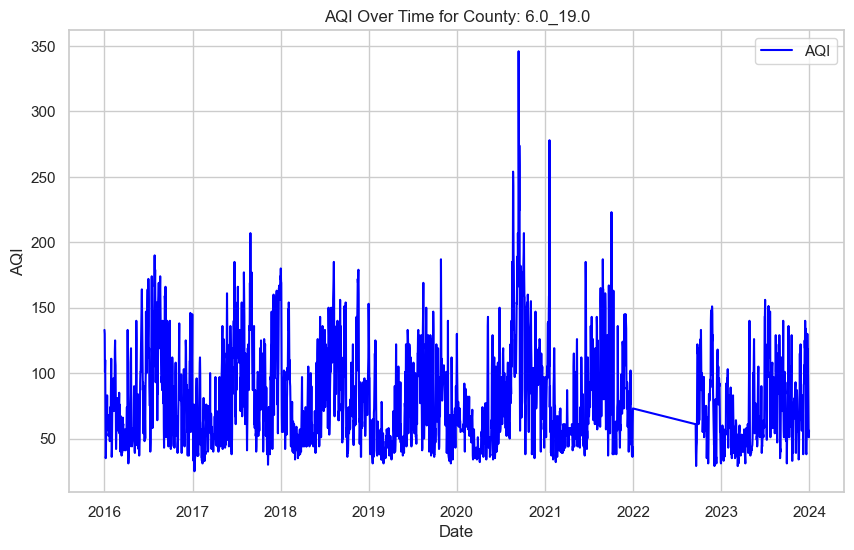

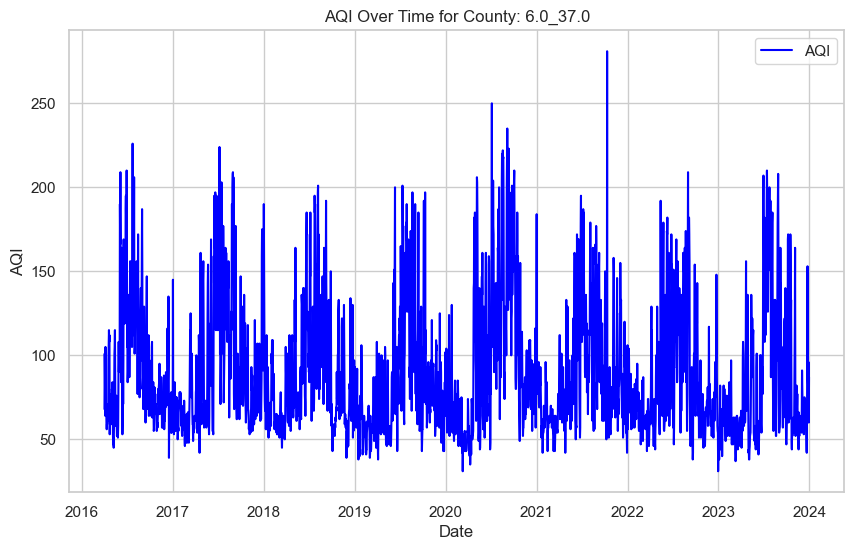

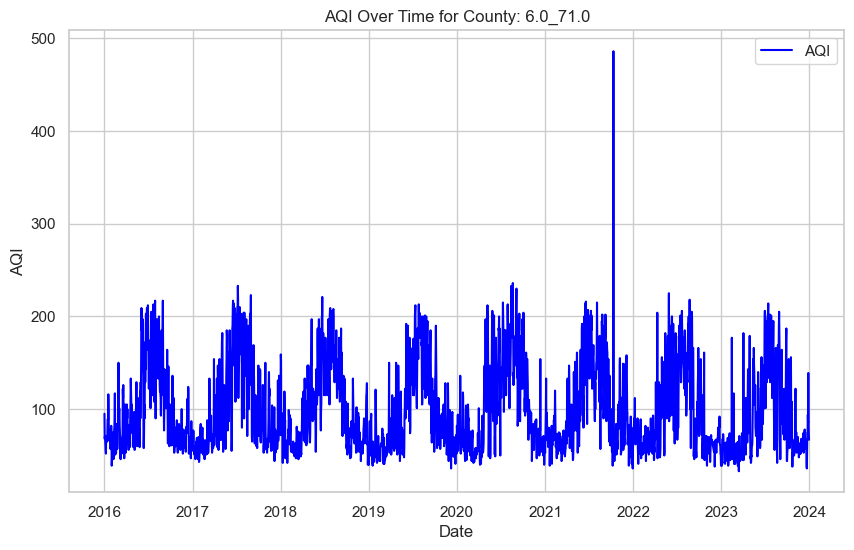

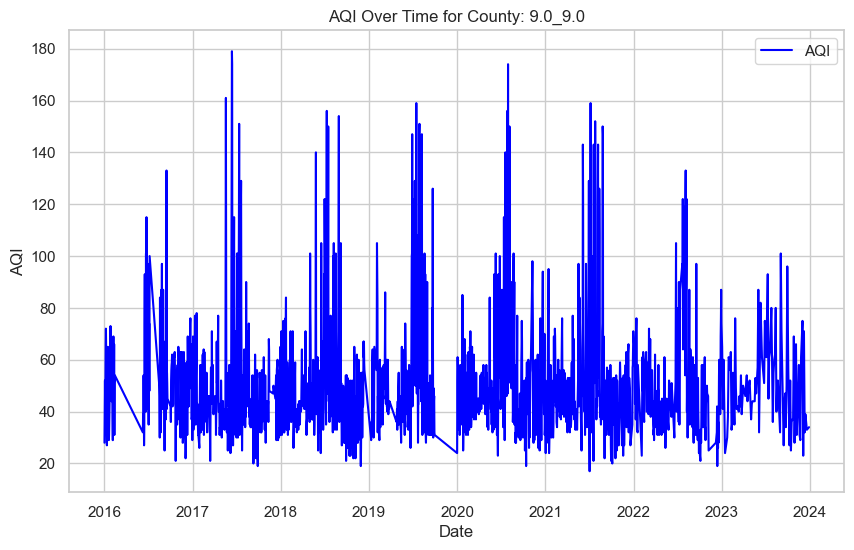

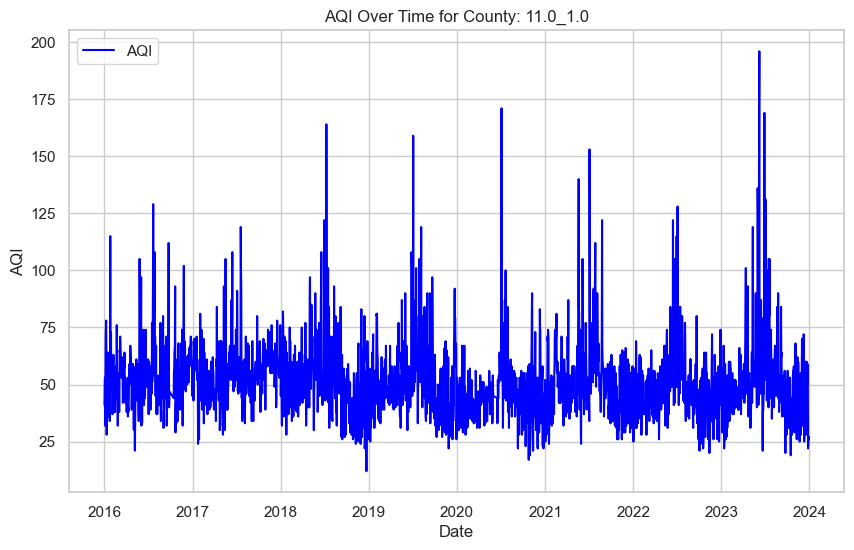

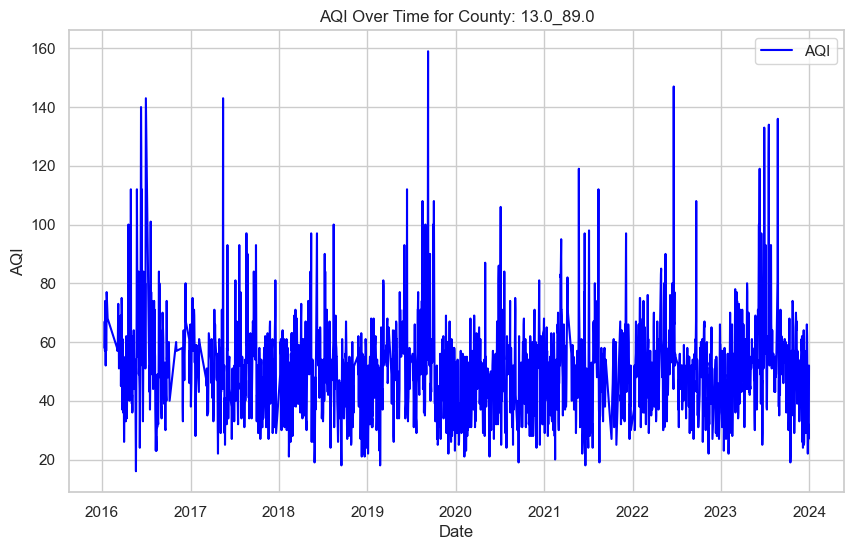

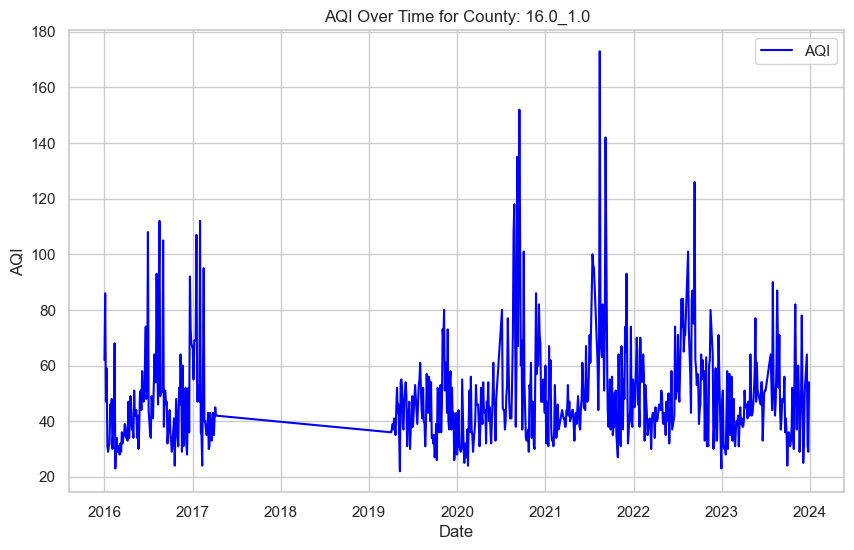

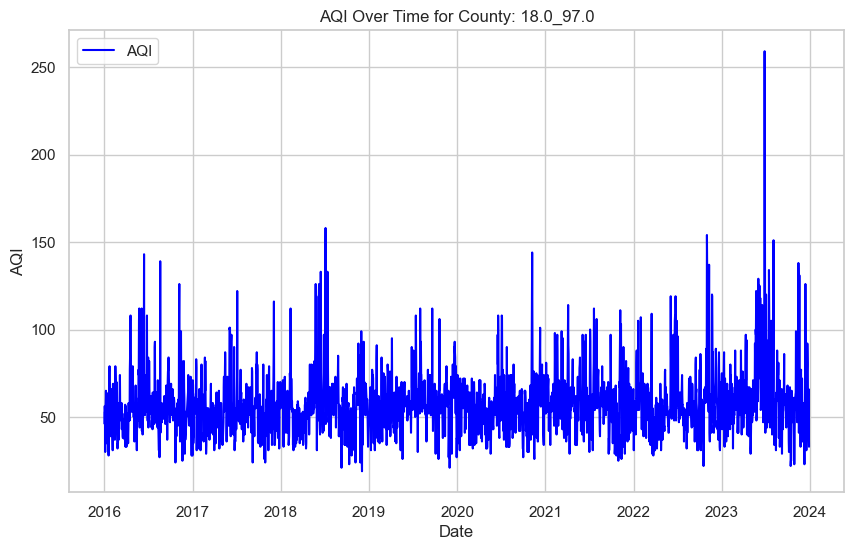

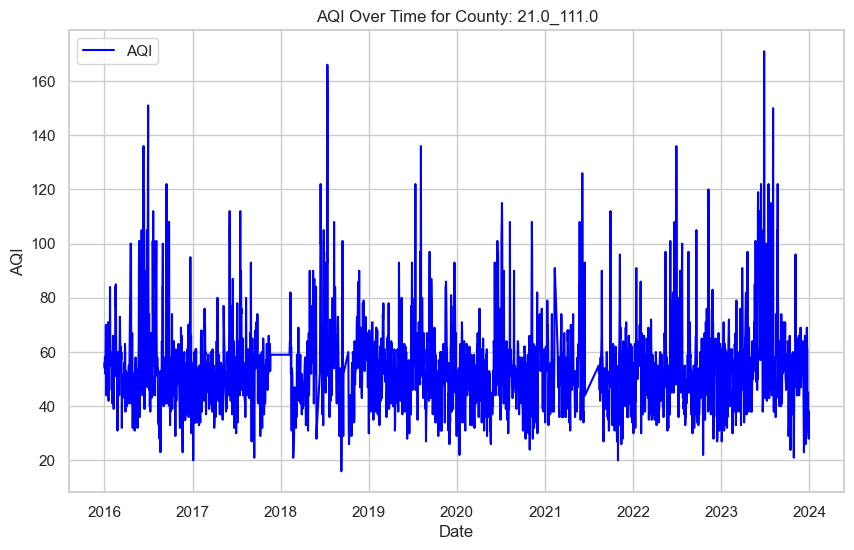

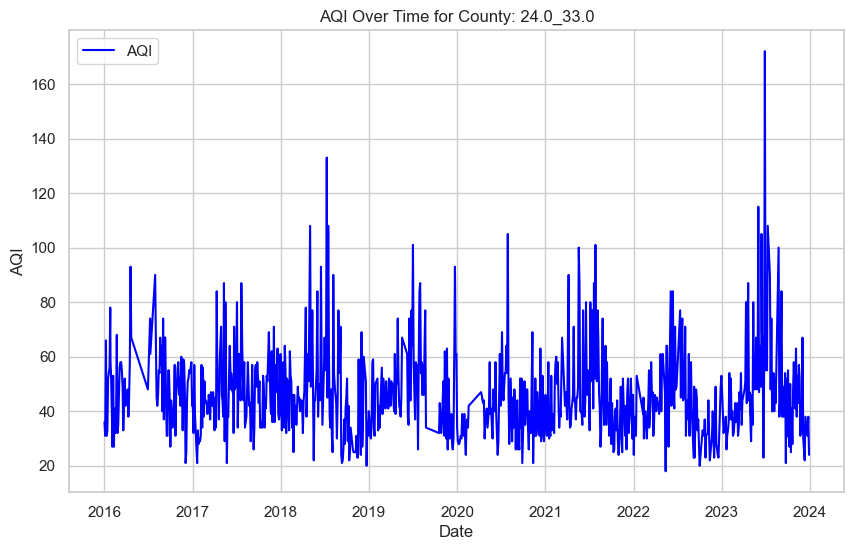

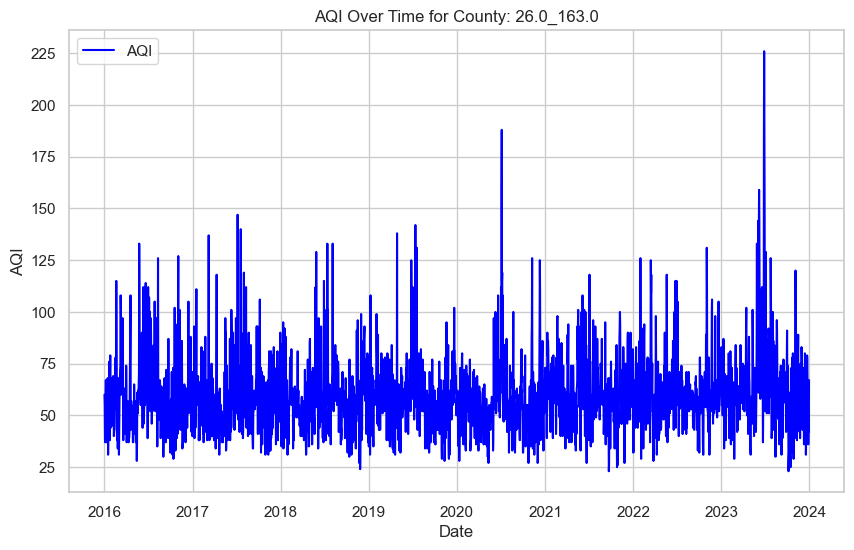

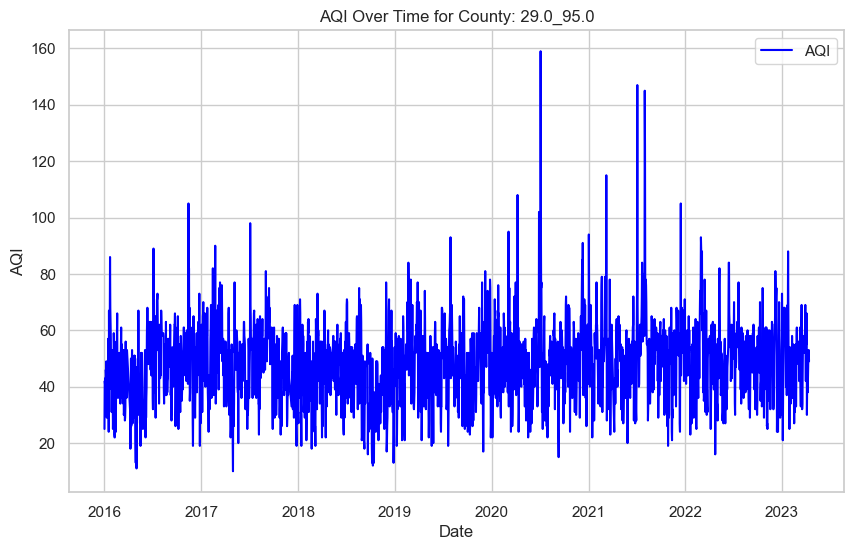

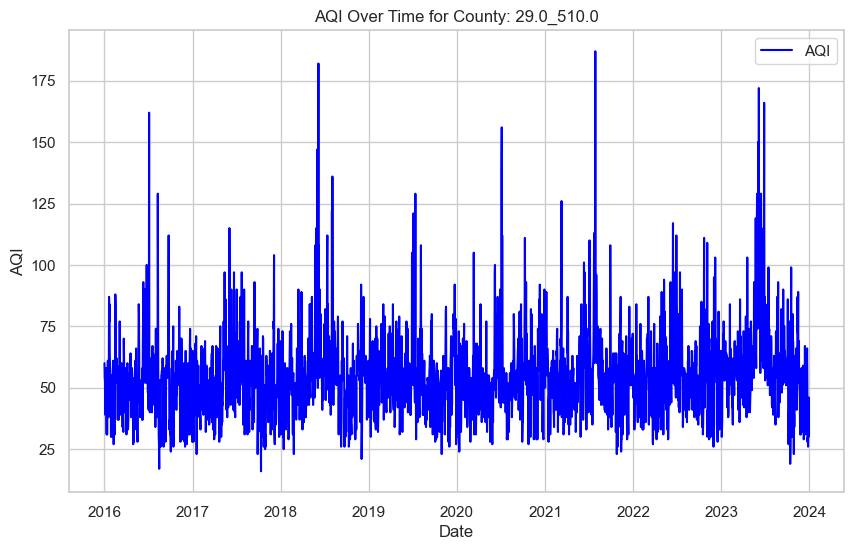

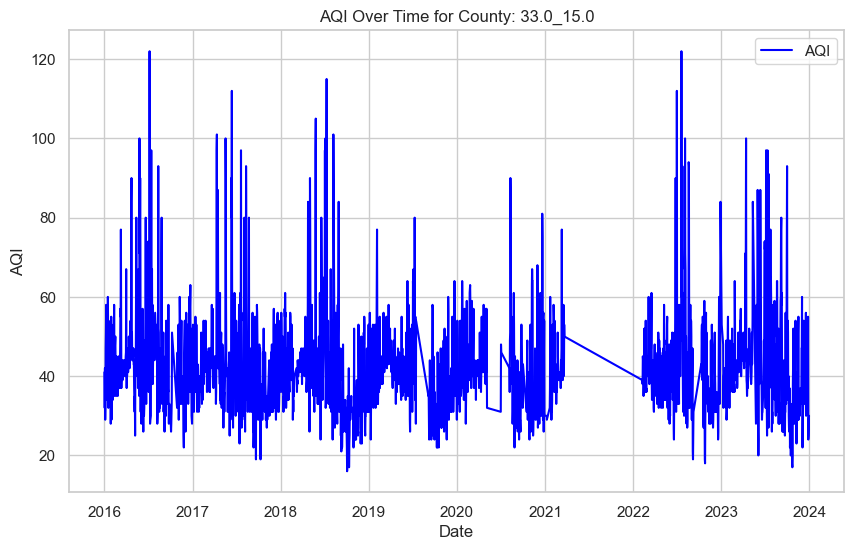

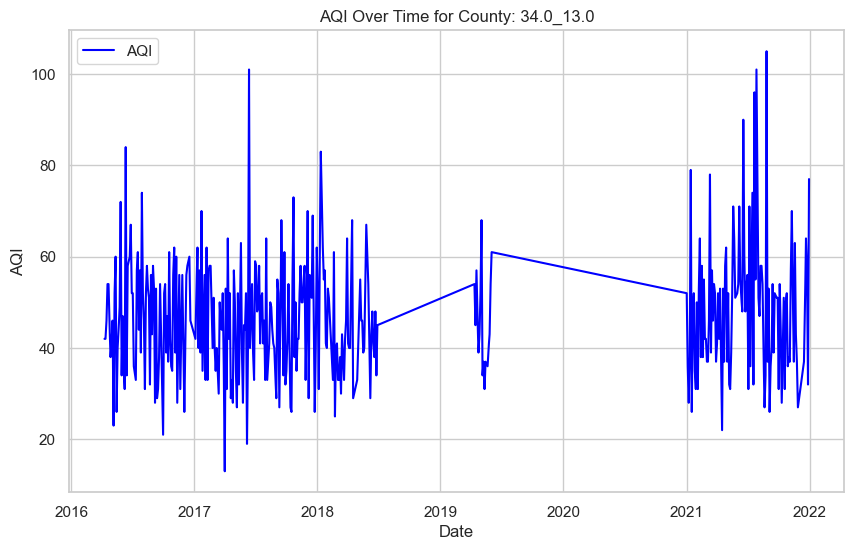

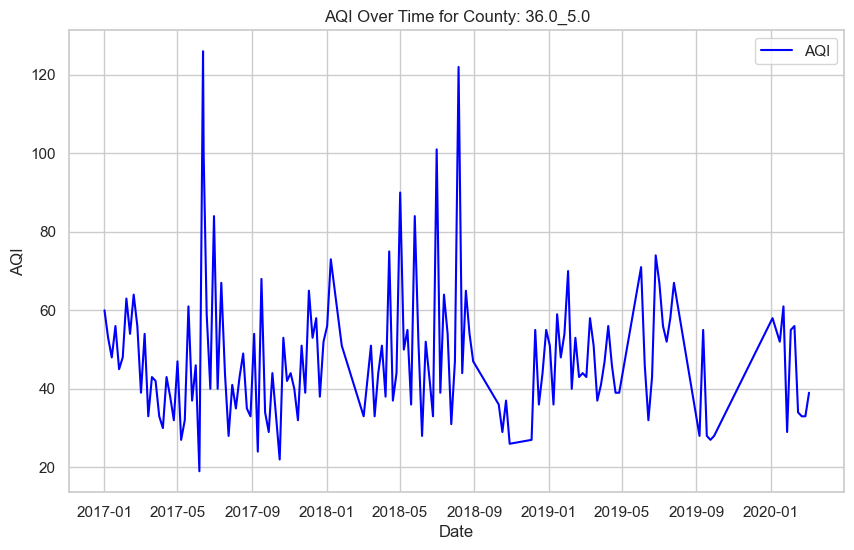

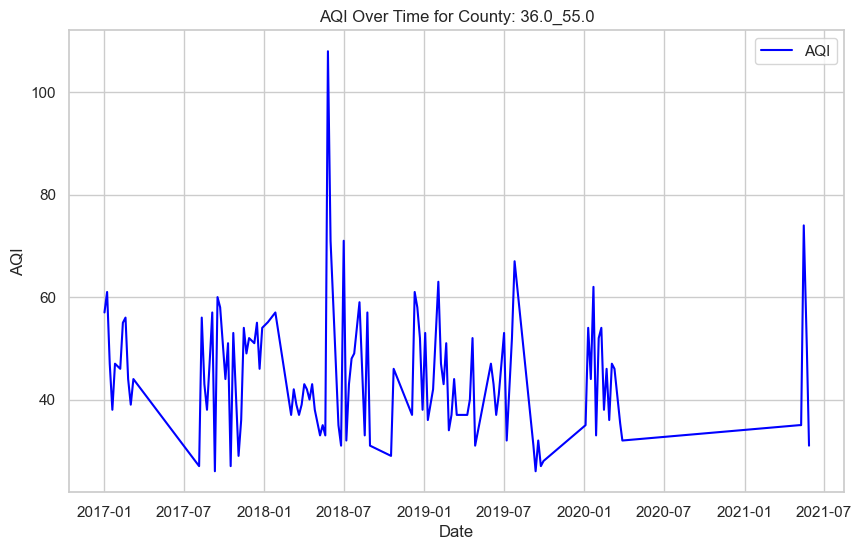

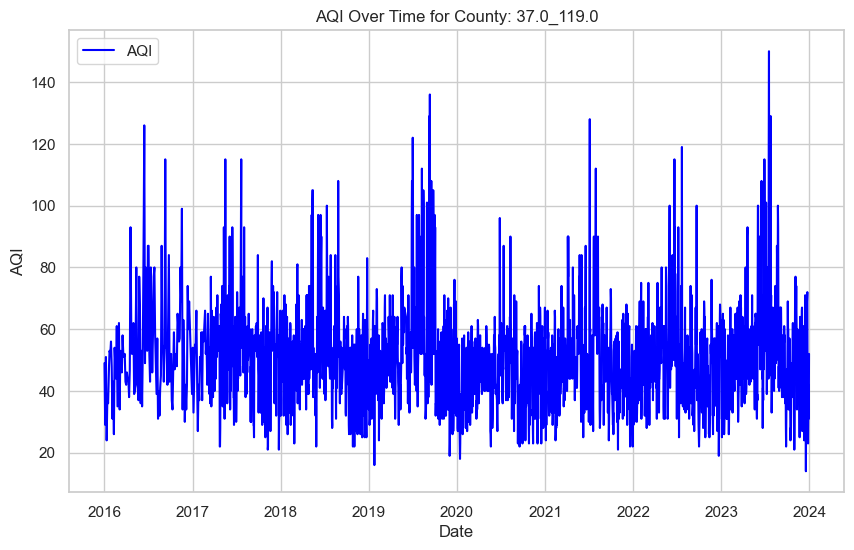

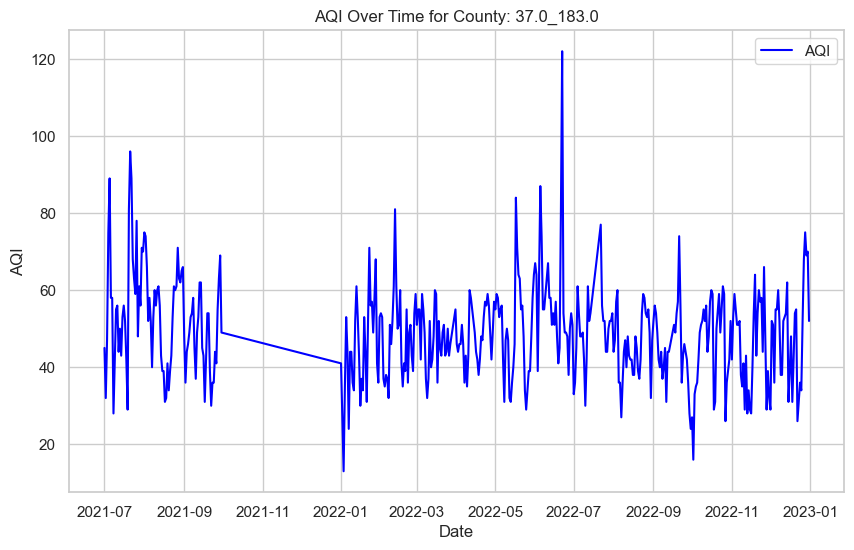

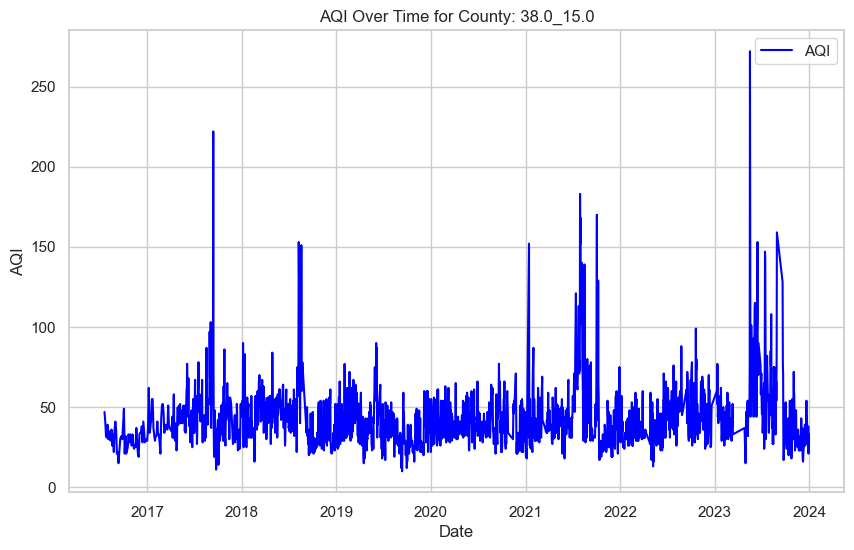

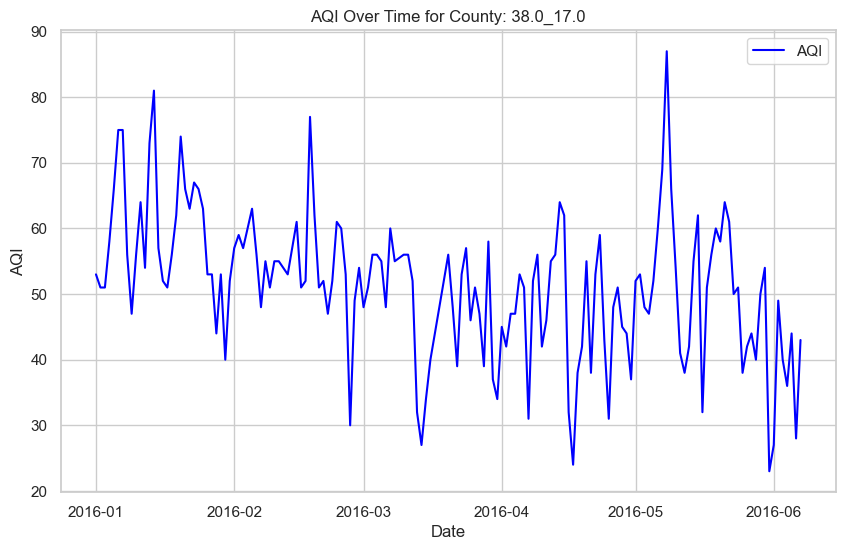

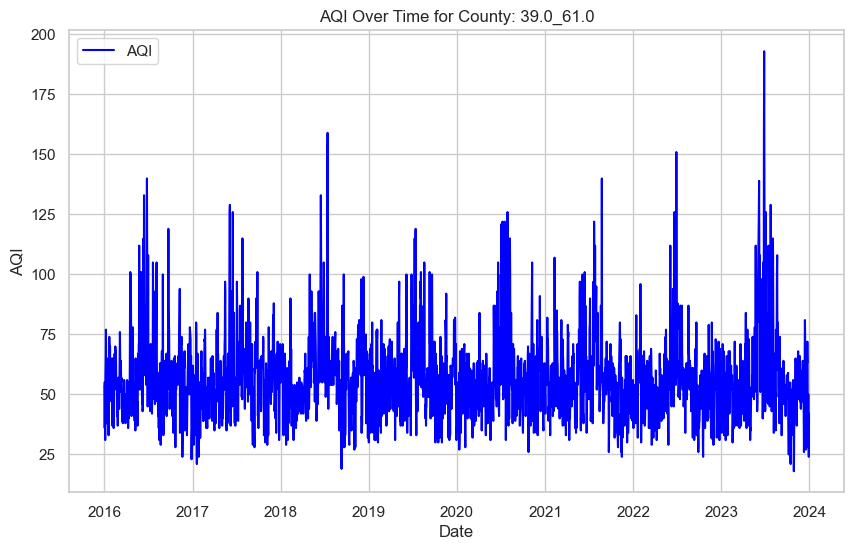

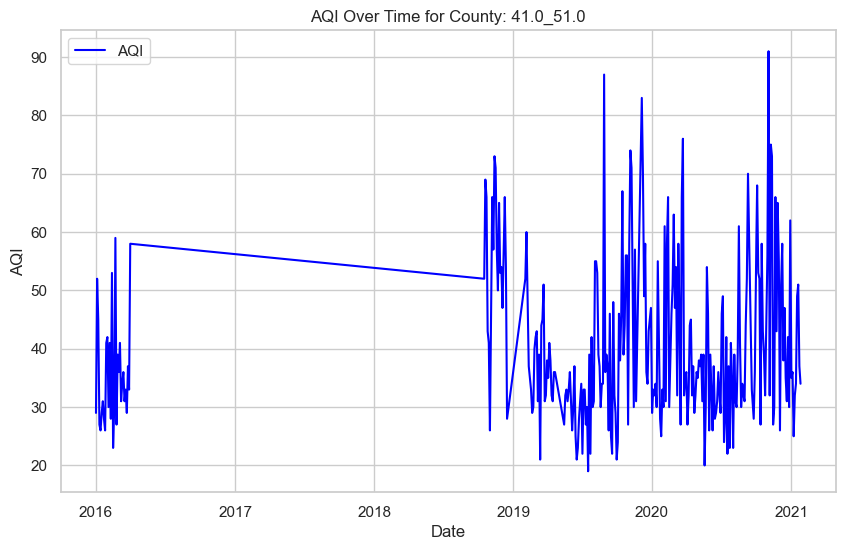

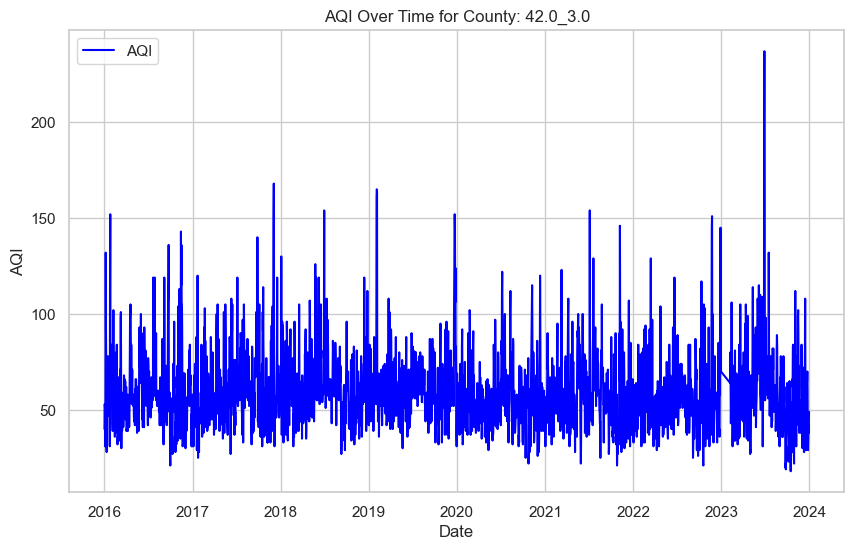

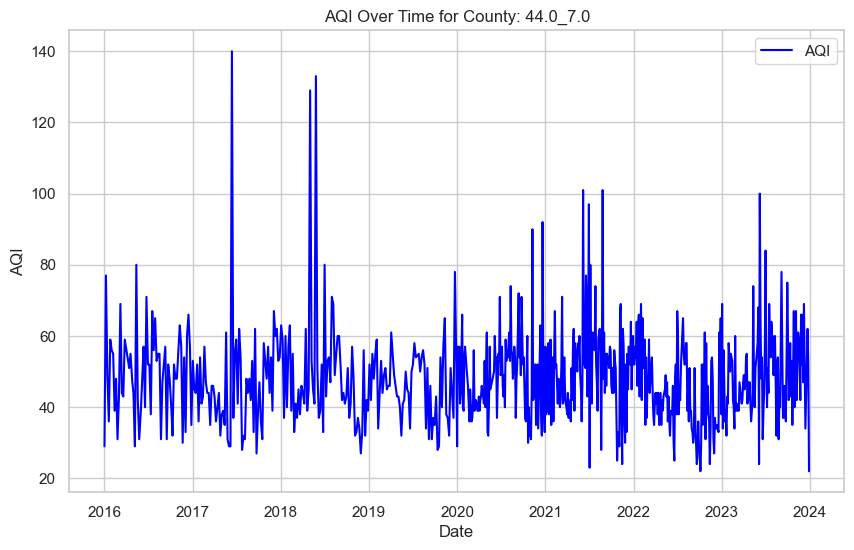

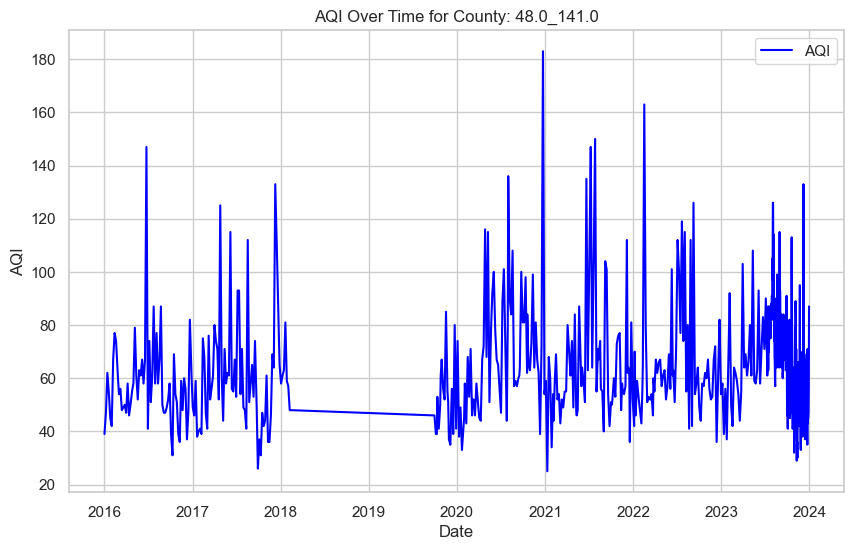

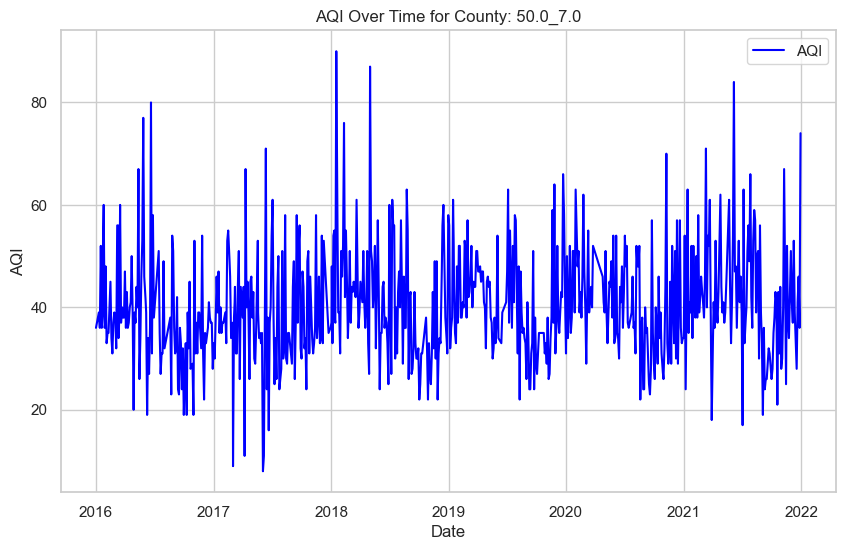

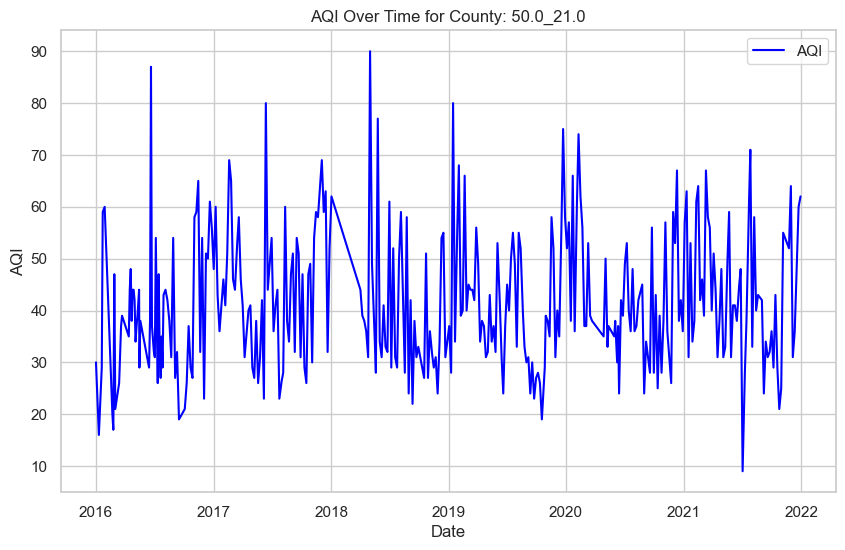

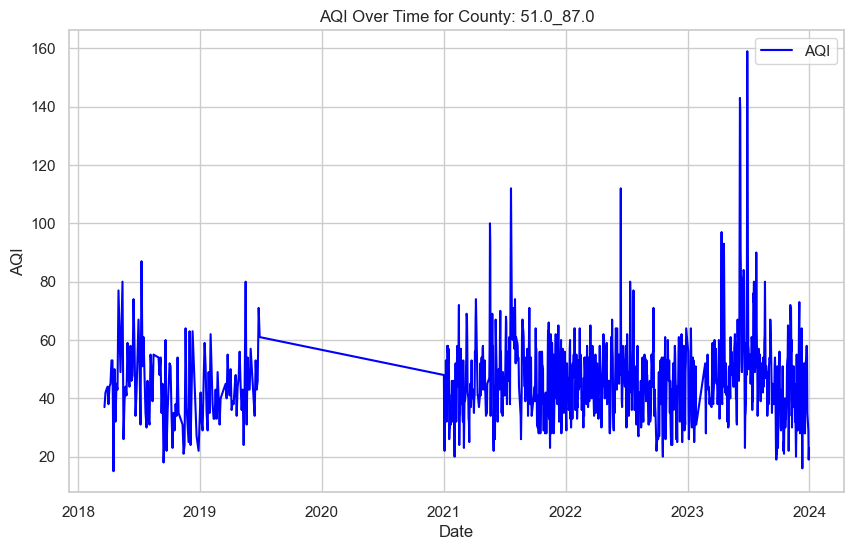

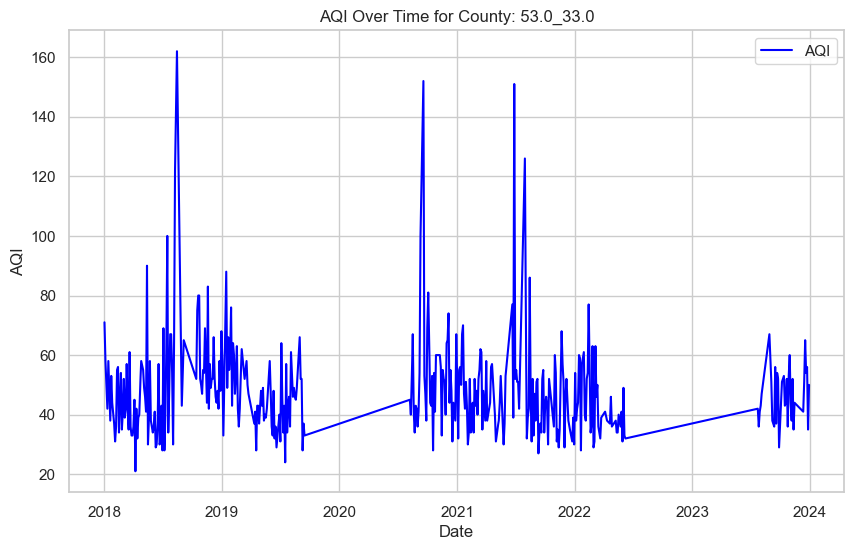

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
# Step 1: Load Data
data = pd.read_csv('/Users/HP/Desktop/Predicting Air Quality and Pollution/combined_final_data.csv',parse_dates=['Date'])

# Step 2: Data Cleaning
data.fillna(method='ffill', inplace=True)
data.sort_values(by=['State Code', 'County Code', 'Date'], inplace=True)

# Step 3: Handling Variability Across Counties
county_groups = data.groupby(['State Code', 'County Code'])

# Function to preprocess each county
def preprocess_county(group):
    group = group.set_index('Date').resample('D').mean()
    group.interpolate(method='linear', inplace=True)
    return group.reset_index()

data_preprocessed = county_groups.apply(preprocess_county)
data_preprocessed.reset_index(drop=True, inplace=True)

# Plotting AQI values over time for each county
for (state_code, county_code), group in data_preprocessed.groupby(['State Code', 'County Code']):
    plt.figure(figsize=(10, 6))
    plt.plot(group['Date'], group['AQI'], label='AQI', color='blue')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title(f'AQI Over Time for County: {state_code}_{county_code}')
    plt.legend()
    plt.grid(True)
    plt.show()


## Eliminating the counties with poorly distributed AQI values and definining the decriptive stats again

In [14]:
import pandas as pd
from tabulate import tabulate

# Load the dataset from the specified path
file_path = '/Users/HP/Desktop/Predicting Air Quality and Pollution/selected_counties_data.csv'
df = pd.read_csv(file_path)

# Identify concentration columns with potential negative values that you want to filter out
concentration_columns = ['CO', 'NO2', 'PM10', 'PM2.5', 'SO2','CO','TEMP']

# Filter out rows where any of the concentration columns have negative values
df = df[(df[concentration_columns] >= 0).all(axis=1)]

# Transposed descriptive statistics for Date columns (categorical/object data)
print("\nDescriptive Statistics for Date")
descriptive_stats = df.describe(include='object').transpose()
print(tabulate(descriptive_stats, headers='keys', tablefmt='fancy_grid', floatfmt=".6f"))

# Drop 'State Code' and 'County Code' and keep only numeric columns
numerical_df = df.drop(columns=['State Code', 'County Code']).select_dtypes(include=['number'])

# Calculate statistics
statistics = {
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Mode': numerical_df.mode().iloc[0],  # Use the first mode
    'Variance': numerical_df.var(),
    'Standard Deviation': numerical_df.std(),
    'Skewness': numerical_df.skew(),
    'Kurtosis': numerical_df.kurt(),
    'Min': numerical_df.min(),
    'Max': numerical_df.max()
}

# Convert the statistics dictionary into a DataFrame
statistics_df = pd.DataFrame(statistics)

# Tabulate the results using fancy_grid format
print("\nStatistics for Numerical Columns (excluding State Code and County Code):")
print(tabulate(statistics_df, headers='keys', tablefmt='fancy_grid', floatfmt=".6f"))



Descriptive Statistics for Date
╒══════╤══════════════╤══════════╤════════════╤═══════════╕
│      │        count │   unique │ top        │      freq │
╞══════╪══════════════╪══════════╪════════════╪═══════════╡
│ Date │ 25321.000000 │     2922 │ 2021-07-03 │ 16.000000 │
╘══════╧══════════════╧══════════╧════════════╧═══════════╛

Statistics for Numerical Columns (excluding State Code and County Code):
╒═══════╤════════════╤════════════╤════════════╤═════════════╤══════════════════════╤════════════╤════════════╤════════════╤═════════════╕
│       │       Mean │     Median │       Mode │    Variance │   Standard Deviation │   Skewness │   Kurtosis │        Min │         Max │
╞═══════╪════════════╪════════════╪════════════╪═════════════╪══════════════════════╪════════════╪════════════╪════════════╪═════════════╡
│ AQI   │  55.329371 │  52.000000 │  52.000000 │  515.811811 │            22.711491 │   2.155094 │   9.050098 │   8.000000 │  346.000000 │
├───────┼────────────┼────────────┼──

## AQI Distribution and Trends

/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


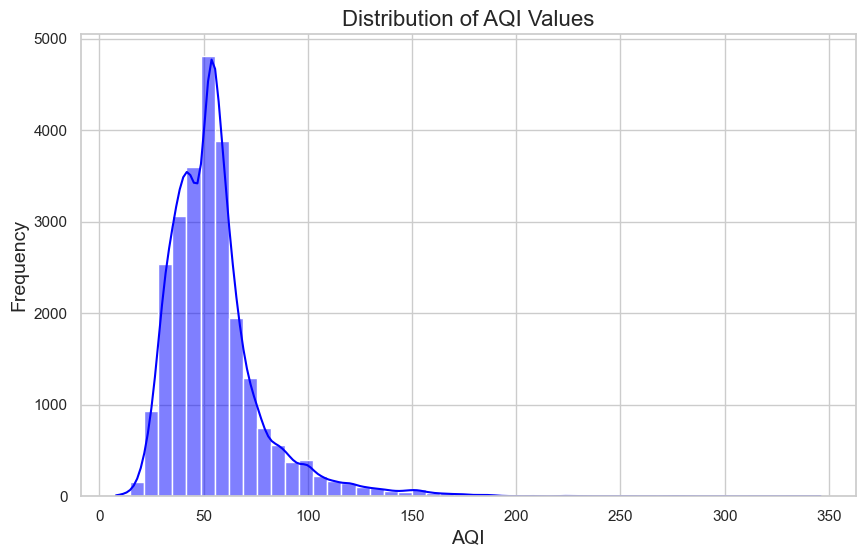

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of AQI values
plt.figure(figsize=(10, 6))

# Histogram + KDE (Kernel Density Estimate)
sns.histplot(df['AQI'], kde=True, bins=50, color='blue')

# Add labels and title
plt.title('Distribution of AQI Values', fontsize=16)
plt.xlabel('AQI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


# Day Trends of AQI

/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

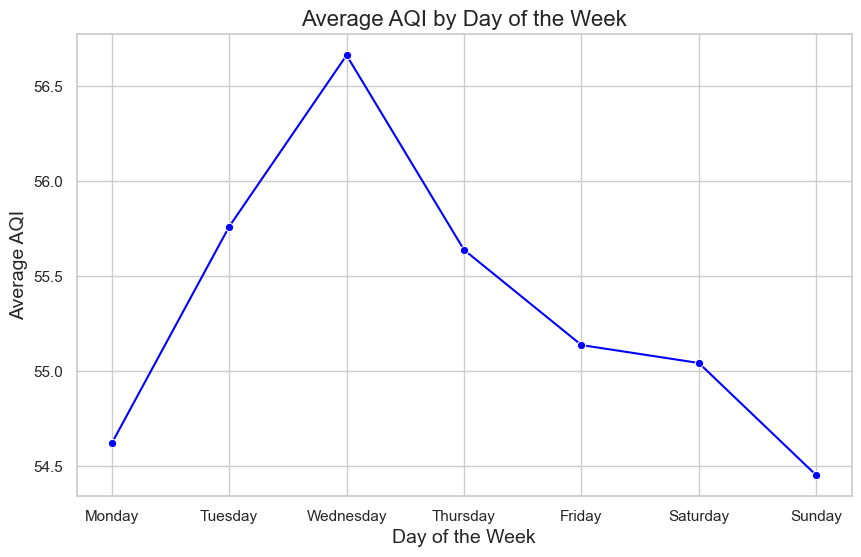

In [16]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows where AQI is missing (NaN)
df = df[df['AQI'].notna()]

# Create a copy of the original DataFrame to avoid modifying the original df
df_trends = df.copy()

# Add new columns for day of the week, month, and year
df_trends['Day of Week'] = df_trends['Date'].dt.day_name()   # e.g., Monday, Tuesday
df_trends['Month'] = df_trends['Date'].dt.month_name()       # e.g., January, February
df_trends['Year'] = df_trends['Date'].dt.year                # Year as integer

# Set the style for the plots
sns.set(style="whitegrid")

# Plot 1: Daily Trend (Day of Week)
plt.figure(figsize=(10, 6))
daily_trend = df_trends.groupby('Day of Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.lineplot(x=daily_trend.index, y=daily_trend.values, marker="o", color="blue")
plt.title('Average AQI by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)
plt.show()



# Monthly Trends of AQI

/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

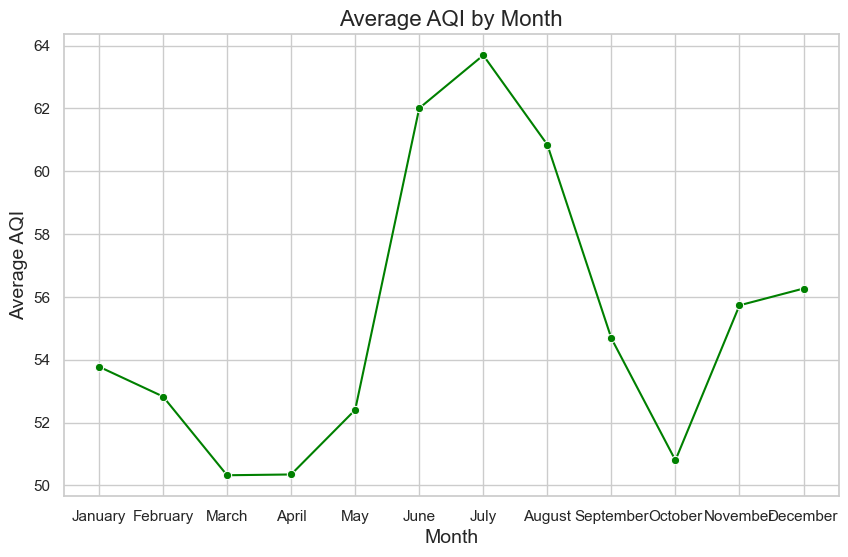

In [17]:

# Plot 2: Monthly Trend
plt.figure(figsize=(10, 6))
monthly_trend = df_trends.groupby('Month')['AQI'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o", color="green")
plt.title('Average AQI by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)
plt.show()


# Yearly Trends of AQI

/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/HP/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

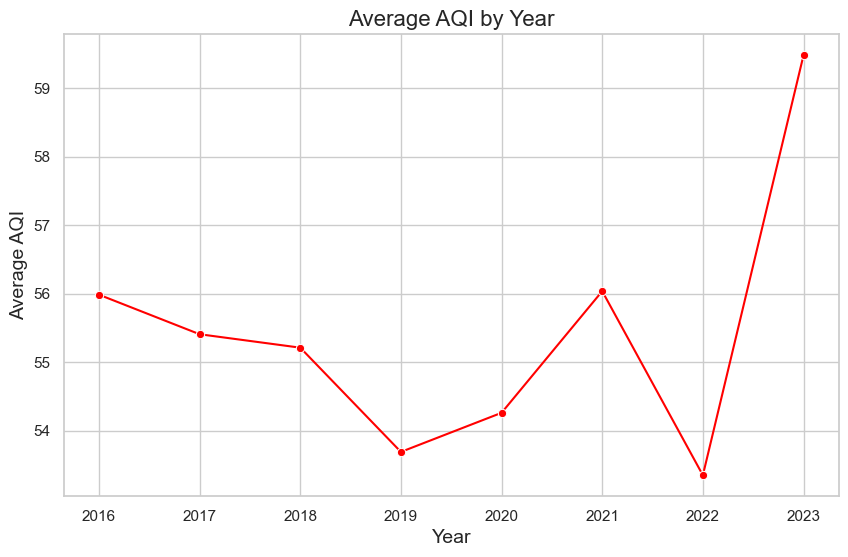

In [18]:
# Plot 3: Yearly Trend
plt.figure(figsize=(10, 6))
yearly_trend = df_trends.groupby('Year')['AQI'].mean()
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="red")
plt.title('Average AQI by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)
plt.show()

# Identifying Extreme Pollution Events

Top 10 Dates with Highest AQI Spikes (250-600):
            Date  AQI
1700  2020-09-13  346
1701  2020-09-14  290
1828  2021-01-19  278
1703  2020-09-16  274
20611 2023-05-17  272
1704  2020-09-17  259
7983  2023-06-28  259
1677  2020-08-21  254


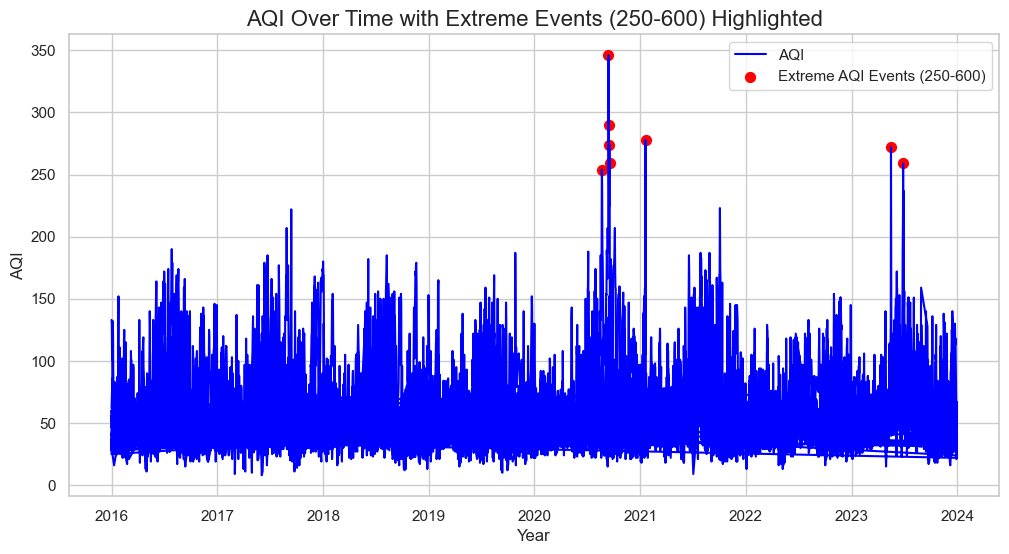

In [24]:
import matplotlib.pyplot as plt

# Define the AQI range for extreme events (250 to 600)
aqi_lower_threshold = 250
aqi_upper_threshold = 600

# Identify rows where AQI is between 250 and 600
extreme_aqi = df[(df['AQI'] >= aqi_lower_threshold) & (df['AQI'] <= aqi_upper_threshold)]

# Sort by AQI in descending order and get the top 10 rows
top_10_aqi_spikes = extreme_aqi.sort_values(by='AQI', ascending=False).head(10)

# Display the top 10 dates with the highest AQI spikes within the range
print("Top 10 Dates with Highest AQI Spikes (250-600):")
print(top_10_aqi_spikes[['Date', 'AQI']])

# Plot AQI over time and highlight extreme events
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['AQI'], color='blue', label='AQI')

# Highlight extreme AQI events in the range 250 to 600
plt.scatter(extreme_aqi['Date'], extreme_aqi['AQI'], color='red', label='Extreme AQI Events (250-600)', s=50)

plt.title('AQI Over Time with Extreme Events (250-600) Highlighted', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Correlation Heat Map

In [ ]:
# Filter the dataframe to keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns only
corr_matrix = numeric_df.corr()

# Plotting a heatmap of correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


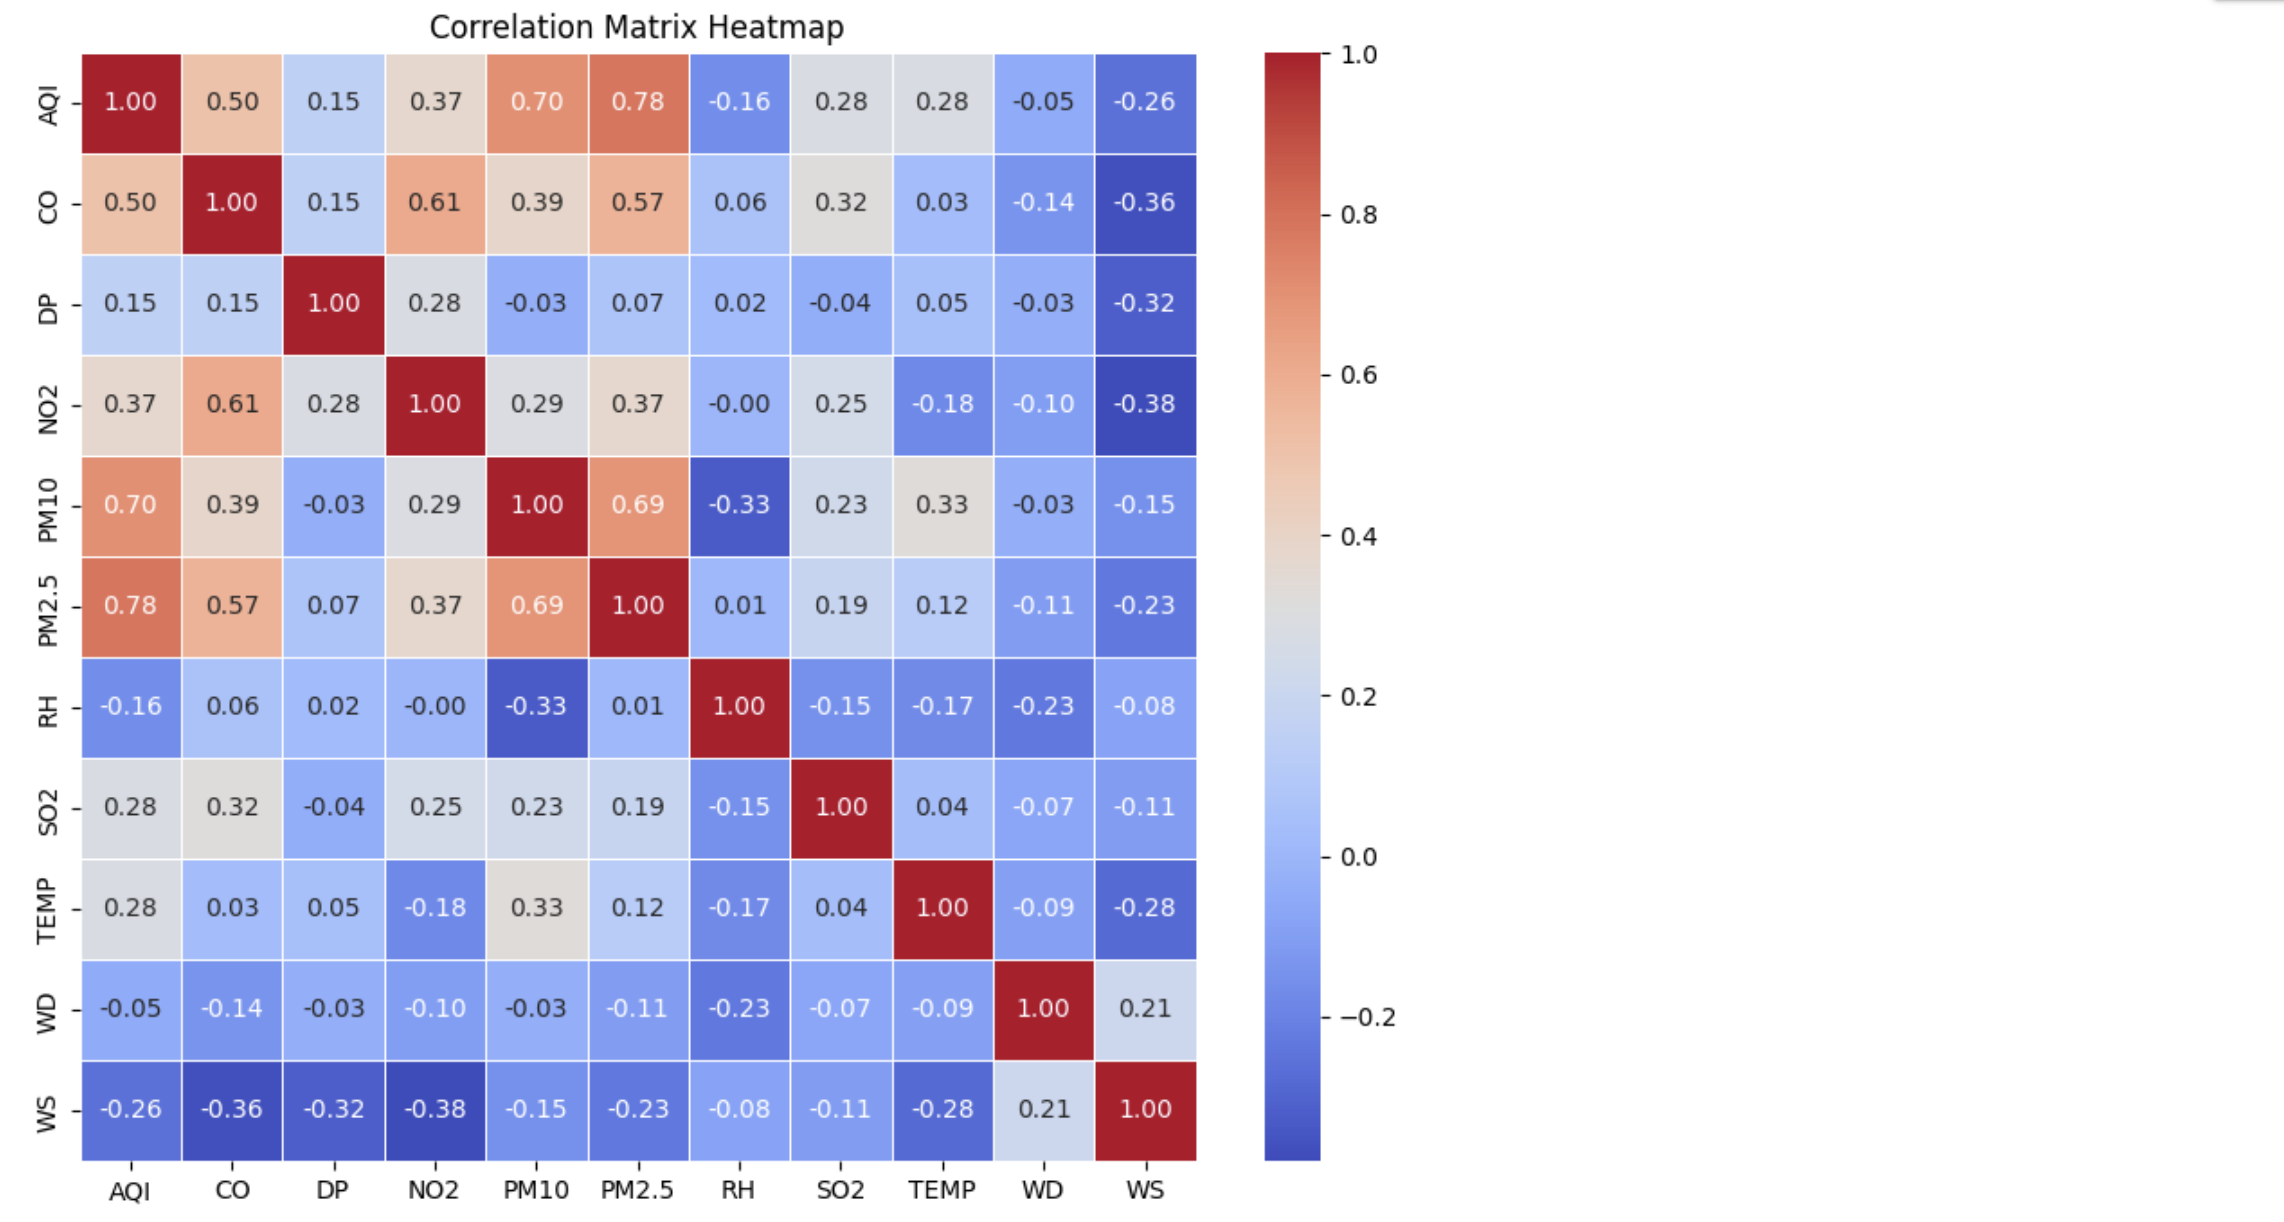